In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
import os
os.chdir('C:\\Users\\Nordine\\OneDrive\\Documents\\P2')

***Description et qualité des données***

**EdStatsCountry.csv**

In [3]:
edStats_df = pd.read_csv('EdStatsCountry.csv')
edStats_df.shape

(241, 32)

In [4]:
# Pour mieux visualiser les données, affichons jusque 100 colonnes et 200 lignes
pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 300)

In [5]:
edStats_df.head(5)

Country Code   Short Name   Table Name                     Long Name  \
0          ABW        Aruba        Aruba                         Aruba   
1          AFG  Afghanistan  Afghanistan  Islamic State of Afghanistan   
2          AGO       Angola       Angola   People's Republic of Angola   
3          ALB      Albania      Albania           Republic of Albania   
4          AND      Andorra      Andorra       Principality of Andorra   

  2-alpha code   Currency Unit  \
0           AW   Aruban florin   
1           AF  Afghan afghani   
2           AO  Angolan kwanza   
3           AL    Albanian lek   
4           AD            Euro   

                                       Special Notes  \
0  SNA data for 2000-2011 are updated from offici...   
1  Fiscal year end: March 20; reporting period fo...   
2  April 2013 database update: Based on IMF data,...   
3                                                NaN   
4                                                NaN   

                      Region          Income Group WB-2 code  \
0  Latin America & Caribbean  High income: nonOECD        AW   
1                 South Asia            Low income        AF   
2         Sub-Saharan Africa   Upper middle income        AO   
3      Europe & Central Asia   Upper middle income        AL   
4      Europe & Central Asia  High income: nonOECD        AD   

                         National accounts base year  \
0                                               2000   
1                                            2002/03   
2                                               2002   
3  Original chained constant price data are resca...   
4                                               1990   

   National accounts reference year                   SNA price valuation  \
0                               NaN     Value added at basic prices (VAB)   
1                               NaN     Value added at basic prices (VAB)   
2                               NaN  Value added at producer prices (VAP)   
3                            1996.0     Value added at basic prices (VAB)   
4                               NaN                                   NaN   

  Lending category Other groups  \
0              NaN          NaN   
1              IDA         HIPC   
2             IBRD          NaN   
3             IBRD          NaN   
4              NaN          NaN   

                         System of National Accounts  \
0  Country uses the 1993 System of National Accou...   
1  Country uses the 1993 System of National Accou...   
2  Country uses the 1993 System of National Accou...   
3  Country uses the 1993 System of National Accou...   
4  Country uses the 1968 System of National Accou...   

  Alternative conversion factor PPP survey year  \
0                           NaN             NaN   
1                           NaN             NaN   
2                       1991–96            2005   
3                           NaN         Rolling   
4                           NaN             NaN   

              Balance of Payments Manual in use  \
0  IMF Balance of Payments Manual, 6th edition.   
1                                           NaN   
2  IMF Balance of Payments Manual, 6th edition.   
3  IMF Balance of Payments Manual, 6th edition.   
4                                           NaN   

  External debt Reporting status       System of trade  \
0                            NaN  Special trade system   
1                         Actual  General trade system   
2                         Actual  Special trade system   
3                         Actual  General trade system   
4                            NaN  Special trade system   

     Government Accounting concept           IMF data dissemination standard  \
0                              NaN                                       NaN   
1  Consolidated central government  General Data Dissemination System (GDDS)   
2     Budgetary central government  General Data Dissemination System (GDDS)   

Ce fichier des informations sur chaque pays. Quels sont les états présents dans l'étude

In [6]:
edStats_df['Short Name'].unique()

array(['Aruba', 'Afghanistan', 'Angola', 'Albania', 'Andorra',
       'Arab World', 'United Arab Emirates', 'Argentina', 'Armenia',
       'American Samoa', 'Antigua and Barbuda', 'Australia', 'Austria',
       'Azerbaijan', 'Burundi', 'Belgium', 'Benin', 'Burkina Faso',
       'Bangladesh', 'Bulgaria', 'Bahrain', 'The Bahamas',
       'Bosnia and Herzegovina', 'Belarus', 'Belize', 'Bermuda',
       'Bolivia', 'Brazil', 'Barbados', 'Brunei', 'Bhutan', 'Botswana',
       'Central African Republic', 'Canada', 'Switzerland',
       'Channel Islands', 'Chile', 'China', "Côte d'Ivoire", 'Cameroon',
       'Dem. Rep. Congo', 'Congo', 'Colombia', 'Comoros', 'Cabo Verde',
       'Costa Rica', 'Cuba', 'Curaçao', 'Cayman Islands', 'Cyprus',
       'Czech Republic', 'Germany', 'Djibouti', 'Dominica', 'Denmark',
       'Dominican Republic', 'Algeria',
       'East Asia & Pacific (developing only)',
       'East Asia & Pacific (all income levels)',
       'Europe & Central Asia (developing only)',


In [7]:
print(edStats_df['Short Name'].unique().shape)
print(edStats_df['Income Group'].unique().shape)


(241,)
(6,)


In [8]:
# On voit qu'il n'y a pas que des Etats mais aussi des régions, voire des niveaux de revenus. (ex: South Asia, "High income")
print(edStats_df['Income Group'].unique())
print(edStats_df['Region'].unique())

['High income: nonOECD' 'Low income' 'Upper middle income' nan
 'Lower middle income' 'High income: OECD']
['Latin America & Caribbean' 'South Asia' 'Sub-Saharan Africa'
 'Europe & Central Asia' nan 'Middle East & North Africa'
 'East Asia & Pacific' 'North America']


In [9]:
# Téléchargeons les codes pays iso
country_iso = pd.read_csv('sql-pays.csv', header=None)

In [10]:
liste_code = country_iso.iloc[:,3]

liste_code.shape

(241,)

In [11]:
# On voit qu'il y a 240 codes pays. Combien de pays sont utilisés dans notre étude

print(edStats_df[edStats_df['Country Code'].isin(liste_code)]['Short Name'].unique())

print(edStats_df[edStats_df['Country Code'].isin(liste_code)]['Short Name'].unique().shape)


['Aruba' 'Afghanistan' 'Angola' 'Albania' 'Andorra' 'United Arab Emirates'
 'Argentina' 'Armenia' 'American Samoa' 'Antigua and Barbuda' 'Australia'
 'Austria' 'Azerbaijan' 'Burundi' 'Belgium' 'Benin' 'Burkina Faso'
 'Bangladesh' 'Bulgaria' 'Bahrain' 'The Bahamas' 'Bosnia and Herzegovina'
 'Belarus' 'Belize' 'Bermuda' 'Bolivia' 'Brazil' 'Barbados' 'Brunei'
 'Bhutan' 'Botswana' 'Central African Republic' 'Canada' 'Switzerland'
 'Chile' 'China' "Côte d'Ivoire" 'Cameroon' 'Dem. Rep. Congo' 'Congo'
 'Colombia' 'Comoros' 'Cabo Verde' 'Costa Rica' 'Cuba' 'Cayman Islands'
 'Cyprus' 'Czech Republic' 'Germany' 'Djibouti' 'Dominica' 'Denmark'
 'Dominican Republic' 'Algeria' 'Ecuador' 'Egypt' 'Eritrea' 'Spain'
 'Estonia' 'Ethiopia' 'Finland' 'Fiji' 'France' 'Faeroe Islands'
 'Micronesia' 'Gabon' 'United Kingdom' 'Georgia' 'Ghana' 'Gibraltar'
 'Guinea' 'The Gambia' 'Guinea-Bissau' 'Equatorial Guinea' 'Greece'
 'Grenada' 'Greenland' 'Guatemala' 'Guam' 'Guyana' 'Hong Kong SAR, China'
 'Honduras' 'Cr

In [12]:
# Il y a 208 pays utilisés dans l'étude
# Quels sont les autres zones ne correspondant pas à un état utilisés dans notre étude
liste_zones = edStats_df[~edStats_df['Country Code'].isin(liste_code)]['Short Name'].unique()
print(liste_zones)
print(liste_zones.shape)

['Arab World' 'Channel Islands' 'Curaçao'
 'East Asia & Pacific (developing only)'
 'East Asia & Pacific (all income levels)'
 'Europe & Central Asia (developing only)'
 'Europe & Central Asia (all income levels)' 'Euro area' 'European Union'
 'High income' 'Heavily indebted poor countries (HIPC)'
 'Latin America & Caribbean (developing only)'
 'Latin America & Caribbean (all income levels)'
 'Least developed countries: UN classification' 'Low income'
 'Lower middle income' 'Low & middle income' 'St. Martin (French part)'
 'Middle East & North Africa (all income levels)' 'Middle income'
 'Middle East & North Africa (developing only)' 'Montenegro'
 'North America' 'OECD members' 'South Asia' 'Serbia'
 'Sub-Saharan Africa (developing only)' 'South Sudan'
 'Sub-Saharan Africa (all income levels)' 'Sint Maarten (Dutch part)'
 'Upper middle income' 'World' 'Kosovo']
(33,)


In [13]:
# Il y a donc 33 zones ne correspondant pas à des états
# Le Montenegro est indépendant depuis peu ainsi que Kosovo (nouveaux pays)
# Les restes sont des zones géographiques ou déterminés par le revenu moyen
# Quels pays ne fait pas partie de l'étude?

np.array(country_iso[~country_iso.loc[:,3].isin(edStats_df['Country Code'])].loc[:,4])


array(['Antarctique', 'Île Bouvet',
       "Territoire Britannique de l'Océan Indien",
       'Îles Vierges Britanniques', 'Taïwan', 'Île Christmas',
       'Îles Cocos (Keeling)', 'Mayotte', 'Îles Cook',
       'Îles (malvinas) Falkland',
       'Géorgie du Sud et les Îles Sandwich du Sud', 'Îles Åland',
       'Guyane Française', 'Terres Australes Françaises', 'Guadeloupe',
       'Îles Heard et Mcdonald',
       'Saint-Siège (état de la Cité du Vatican)', 'Martinique',
       'Montserrat', 'Antilles Néerlandaises', 'Niué', 'Île Norfolk',
       'Îles Mineures Éloignées des États-Unis', 'Pitcairn', 'Réunion',
       'Sainte-Hélène', 'Anguilla', 'Saint-Pierre-et-Miquelon',
       'Sahara Occidental', 'Svalbard etÎle Jan Mayen', 'Tokelau',
       'Wallis et Futuna', 'Serbie-et-Monténégro'], dtype=object)

In [14]:
# Il s'agit essentiellement d'iles 
# On constate qu'il y a des données redondantes comme Morocco inclus dans la zone 'Middle East & North Africa (all income levels)'

edStats_df[edStats_df['Short Name'] == 'Morocco']['Region']


135    Middle East & North Africa
Name: Region, dtype: object

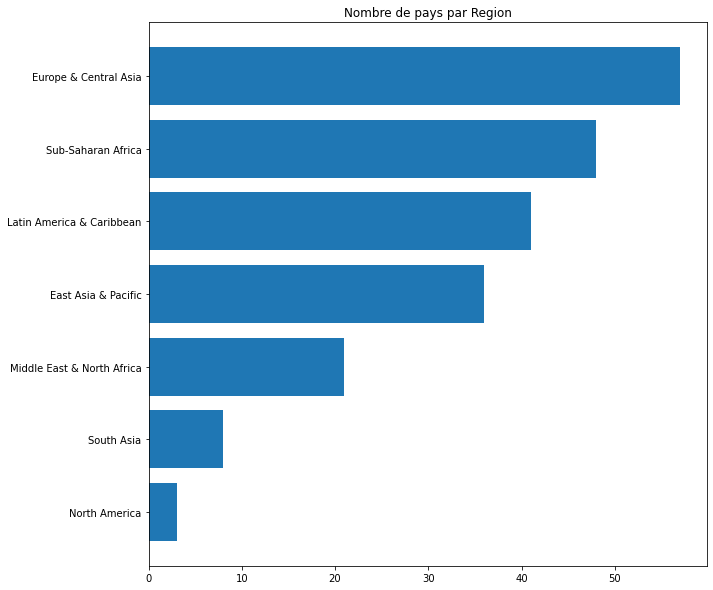

In [15]:
# Quels est le nombre de pays ou zones par Region
plt.figure(figsize=(10,10))
plt.barh(y = edStats_df.groupby('Region')[['Short Name']].count().reset_index().sort_values(by = 'Short Name')['Region'], width =edStats_df.groupby('Region')[['Short Name']].count().reset_index()['Short Name'].sort_values())
plt.title('Nombre de pays par Region')
plt.show()


Sans surprise, les régions contenant le plus de pays petit par la taille ont le plus de pays présents dans l'étude.

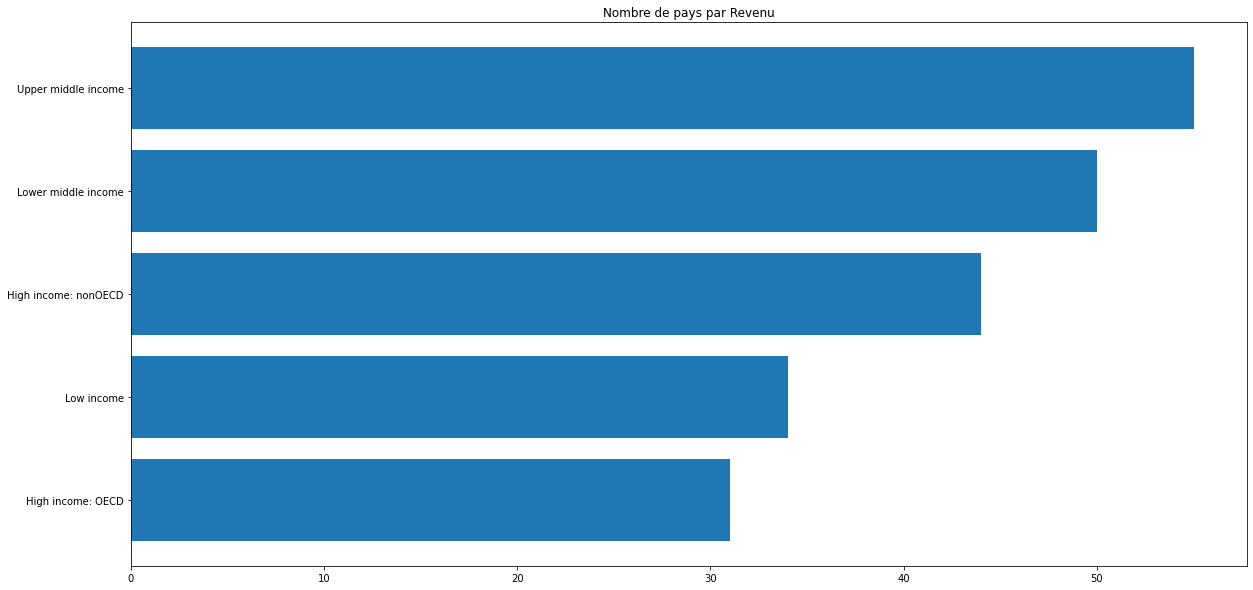

In [16]:
# Nombre de pays par rang de revenus
plt.figure(figsize=(20,10))
plt.barh(y = edStats_df.groupby('Income Group')[['Short Name']].count().reset_index().sort_values(by = 'Short Name')['Income Group'], width =edStats_df.groupby('Income Group')[['Short Name']].count().reset_index()['Short Name'].sort_values())
plt.title('Nombre de pays par Revenu')
plt.show()

Voyons s'il y a des NA:

<AxesSubplot:>

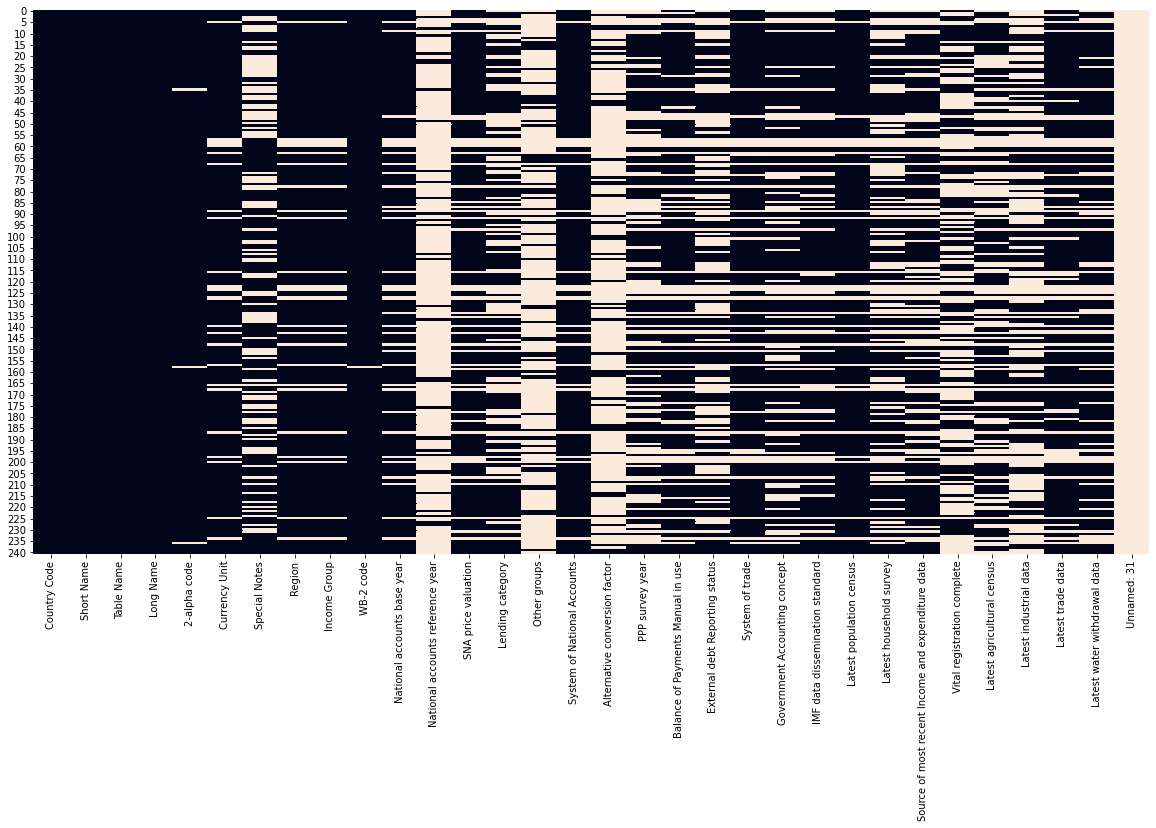

In [17]:
plt.figure(figsize=(20,10))
sns.heatmap(edStats_df.isna(), cbar=False)

In [18]:
pourcentage = {}
for col in edStats_df.columns:
    pourcentage[col] = edStats_df[col].isna().sum()/edStats_df.shape[0]
for k, v in sorted(pourcentage.items(), key=lambda x: x[1]):
    print(f'{k:-<50} {v}')

Country Code-------------------------------------- 0.0
Short Name---------------------------------------- 0.0
Table Name---------------------------------------- 0.0
Long Name----------------------------------------- 0.0
WB-2 code----------------------------------------- 0.004149377593360996
2-alpha code-------------------------------------- 0.012448132780082987
Currency Unit------------------------------------- 0.1078838174273859
System of National Accounts----------------------- 0.1078838174273859
Region-------------------------------------------- 0.11203319502074689
Income Group-------------------------------------- 0.11203319502074689
Latest population census-------------------------- 0.11618257261410789
National accounts base year----------------------- 0.14937759336099585
System of trade----------------------------------- 0.17012448132780084
SNA price valuation------------------------------- 0.1825726141078838
Latest trade data--------------------------------- 0.23236514522821577


On voit qu'il y a des colonnes avec une majorité de NA: Vital registration, Latest industrial data, Other groups, Alternative conversion factor et National accounts reference year.
La colonne Unnamed: 31 ne contient que des NA

In [19]:
edStats_df = edStats_df.drop(columns=['Unnamed: 31'])

Vérifions si le fichier contient des lignes dupliqués:

In [20]:
edStats_df.duplicated().sum()

0

**EdStatsCountry-Series.csv**

In [21]:
edStatsCountrySeries = pd.read_csv('EdStatsCountry-Series.csv')
print(edStatsCountrySeries.shape)
edStatsCountrySeries.head(5)

(613, 4)


CountryCode         SeriesCode  \
0         ABW        SP.POP.TOTL   
1         ABW        SP.POP.GROW   
2         AFG        SP.POP.GROW   
3         AFG  NY.GDP.PCAP.PP.CD   
4         AFG        SP.POP.TOTL   

                                         DESCRIPTION  Unnamed: 3  
0  Data sources : United Nations World Population...         NaN  
1  Data sources: United Nations World Population ...         NaN  
2  Data sources: United Nations World Population ...         NaN  
3                 Estimates are based on regression.         NaN  
4  Data sources : United Nations World Population...         NaN

In [22]:
# Il y a 614 lignes et 4 colonnes
# Ce dataset informe sur la source de données utilisées pour chaque pays ou zone géographique
# Est ce que tous les pays présent dans le fichier 

print(edStatsCountrySeries['CountryCode'].unique().shape)
print(edStats_df['Country Code'].unique().shape)

(211,)
(241,)


In [23]:
# Il y a 211 pays/zones géographiques alors que le fichier edStatsCountry en contenait 241
# Quels sont les pays dont on ne dispose pas de la source des données?

edStats_df[~edStats_df['Country Code'].isin(edStatsCountrySeries['CountryCode'].unique())]['Short Name'].unique()

array(['Arab World', 'Curaçao', 'East Asia & Pacific (developing only)',
       'East Asia & Pacific (all income levels)',
       'Europe & Central Asia (developing only)',
       'Europe & Central Asia (all income levels)', 'Euro area',
       'European Union', 'High income',
       'Heavily indebted poor countries (HIPC)',
       'Latin America & Caribbean (developing only)',
       'Latin America & Caribbean (all income levels)',
       'Least developed countries: UN classification', 'Low income',
       'Lower middle income', 'Low & middle income',
       'St. Martin (French part)',
       'Middle East & North Africa (all income levels)', 'Middle income',
       'Middle East & North Africa (developing only)', 'North America',
       'Nauru', 'OECD members', 'South Asia',
       'Sub-Saharan Africa (developing only)', 'South Sudan',
       'Sub-Saharan Africa (all income levels)',
       'Sint Maarten (Dutch part)', 'Upper middle income', 'World'],
      dtype=object)

In [24]:
# Combien de sources par zones géographiques
nbreSources = edStatsCountrySeries.groupby('CountryCode').count().reset_index().sort_values(by='SeriesCode', ascending=False)[['CountryCode', 'SeriesCode']]

topNbreSources = nbreSources[nbreSources['SeriesCode'] > 2]

listeNomPays = []
listeNbreSources = []

for codePays in topNbreSources['CountryCode'].values:
    nomPays = edStats_df[edStats_df['Country Code'] == codePays]['Short Name'].values[0] 
    listeNomPays.append(nomPays)
    nbreSources = topNbreSources[topNbreSources['CountryCode'] == codePays]['SeriesCode'].to_frame().values[0][0] 
    listeNbreSources.append(nbreSources)
    print(f'{nomPays:-<30} {nbreSources}')



Moldova----------------------- 18
Georgia----------------------- 18
Cyprus------------------------ 12
Serbia------------------------ 12
Mauritius--------------------- 12
Tanzania---------------------- 12
Morocco----------------------- 12
Syrian Arab Republic---------- 8
Eritrea----------------------- 8
Guyana------------------------ 8
San Marino-------------------- 8
Somalia----------------------- 8
Turkmenistan------------------ 8
Timor-Leste------------------- 8
Puerto Rico------------------- 8
Afghanistan------------------- 8
Argentina--------------------- 8
Kosovo------------------------ 8
Uzbekistan-------------------- 8
Libya------------------------- 8
Lebanon----------------------- 8
France------------------------ 6
West Bank and Gaza------------ 6
Channel Islands--------------- 6
Malaysia---------------------- 6
Australia--------------------- 6
China------------------------- 6
Venezuela--------------------- 3


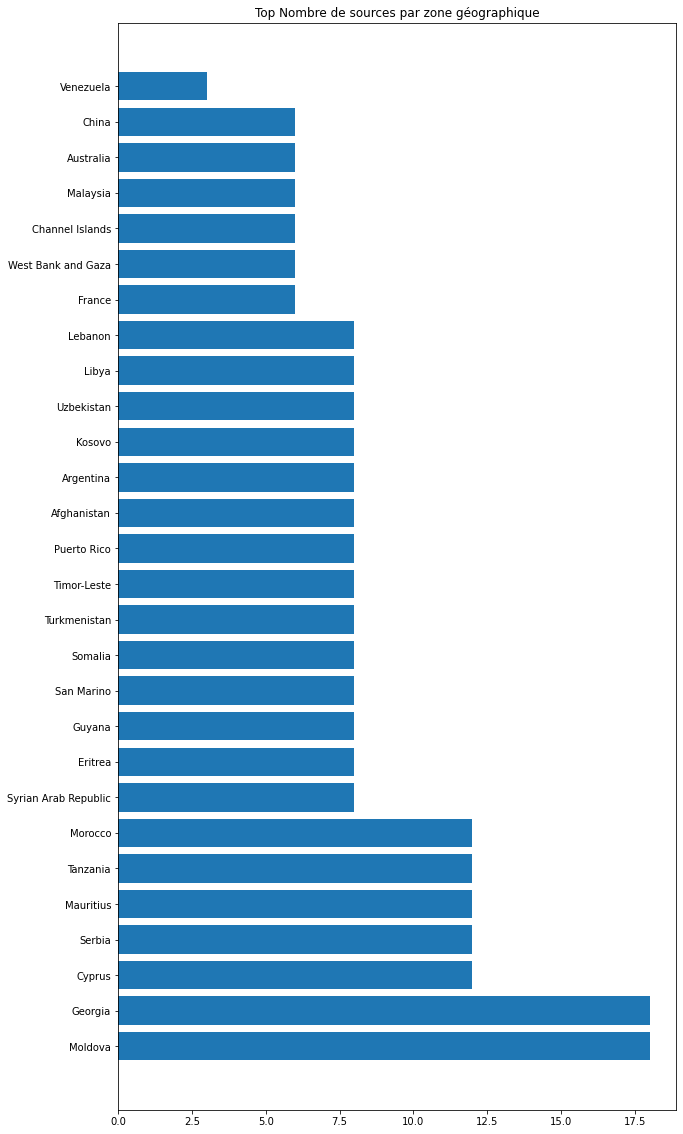

In [25]:
# Le minimum de sources par pays est 2
# Regardons les pays dont on dispose de plus de données

plt.figure(figsize=(10,20))
plt.barh(y=listeNomPays, 
         width=listeNbreSources)
plt.title('Top Nombre de sources par zone géographique')
plt.show()

**EdStatsData.csv**

In [26]:
edStatData = pd.read_csv('EdStatsData.csv')
edStatData.head(5)

Country Name Country Code  \
0   Arab World          ARB   
1   Arab World          ARB   
2   Arab World          ARB   
3   Arab World          ARB   
4   Arab World          ARB   

                                      Indicator Name  Indicator Code  \
0  Adjusted net enrolment rate, lower secondary, ...      UIS.NERA.2   
1  Adjusted net enrolment rate, lower secondary, ...    UIS.NERA.2.F   
2  Adjusted net enrolment rate, lower secondary, ...  UIS.NERA.2.GPI   
3  Adjusted net enrolment rate, lower secondary, ...    UIS.NERA.2.M   
4  Adjusted net enrolment rate, primary, both sex...     SE.PRM.TENR   

        1970       1971       1972       1973       1974      1975       1976  \
0        NaN        NaN        NaN        NaN        NaN       NaN        NaN   
1        NaN        NaN        NaN        NaN        NaN       NaN        NaN   
2        NaN        NaN        NaN        NaN        NaN       NaN        NaN   
3        NaN        NaN        NaN        NaN        NaN       NaN        NaN   
4  54.822121  54.894138  56.209438  57.267109  57.991138  59.36554  60.999962   

       1977      1978       1979       1980       1981       1982       1983  \
0       NaN       NaN        NaN        NaN        NaN        NaN        NaN   
1       NaN       NaN        NaN        NaN        NaN        NaN        NaN   
2       NaN       NaN        NaN        NaN        NaN        NaN        NaN   
3       NaN       NaN        NaN        NaN        NaN        NaN        NaN   
4  61.92268  62.69342  64.383186  65.617767  66.085152  66.608139  67.290451   

        1984       1985       1986      1987       1988       1989       1990  \
0        NaN        NaN        NaN       NaN        NaN        NaN        NaN   
1        NaN        NaN        NaN       NaN        NaN        NaN        NaN   
2        NaN        NaN        NaN       NaN        NaN        NaN        NaN   
3        NaN        NaN        NaN       NaN        NaN        NaN        NaN   
4  68.510094  69.033211  69.944908  71.04187  71.693779  71.699097  71.995819   

        1991       1992       1993       1994      1995       1996       1997  \
0        NaN        NaN        NaN        NaN       NaN        NaN        NaN   
1        NaN        NaN        NaN        NaN       NaN        NaN        NaN   
2        NaN        NaN        NaN        NaN       NaN        NaN        NaN   
3        NaN        NaN        NaN        NaN       NaN        NaN        NaN   
4  72.602837  70.032722  70.464821  72.645683  71.81176  73.903511  74.425201   

        1998       1999       2000       2001       2002       2003  \
0        NaN        NaN        NaN        NaN        NaN        NaN   
1        NaN        NaN        NaN        NaN        NaN        NaN   
2        NaN        NaN        NaN        NaN        NaN        NaN   
3        NaN        NaN        NaN        NaN        NaN        NaN   
4  75.110817  76.254318  77.245682  78.800522  80.051399  80.805389   

        2004       2005       2006       2007       2008       2009  \
0        NaN        NaN        NaN        NaN        NaN        NaN   
1        NaN        NaN        NaN        NaN        NaN        NaN   
2        NaN        NaN        NaN        NaN        NaN        NaN   
3        NaN        NaN        NaN        NaN        NaN        NaN   
4  81.607063  82.489487  82.685509  83.280342  84.011871  84.195961   

        2010      2011       2012      2013       2014  2015  2016  2017  \
0        NaN       NaN        NaN       NaN        NaN   NaN   NaN   NaN   
1        NaN       NaN        NaN       NaN        NaN   NaN   NaN   NaN   
2        NaN       NaN        NaN       NaN        NaN   NaN   NaN   NaN   
3        NaN       NaN        NaN       NaN        NaN   NaN   NaN   NaN   
4  85.211998  85.24514  86.101669  85.51194  85.320152   NaN   NaN   NaN   

   2020  2025  2030  2035  2040  2045  2050  2055  2060  2065  2070  2075  \
0   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   

In [27]:
edStatData.shape

(886930, 70)

In [28]:
# Nombre d'indicateurs
edStatData['Indicator Name'].nunique()


3665

In [29]:
# Nombre de pays
edStatData['Country Name'].nunique()

242

In [30]:
# Même si le nombre de zones géographique est le même que celui du premier fichier, vérifions que ceux ci sont identiques
edStats_df[~edStats_df['Country Code'].isin(edStats_df['Country Code'].unique())]

Empty DataFrame
Columns: [Country Code, Short Name, Table Name, Long Name, 2-alpha code, Currency Unit, Special Notes, Region, Income Group, WB-2 code, National accounts base year, National accounts reference year, SNA price valuation, Lending category, Other groups, System of National Accounts, Alternative conversion factor, PPP survey year, Balance of Payments Manual in use, External debt Reporting status, System of trade, Government Accounting concept, IMF data dissemination standard, Latest population census, Latest household survey, Source of most recent Income and expenditure data, Vital registration complete, Latest agricultural census, Latest industrial data, Latest trade data, Latest water withdrawal data]
Index: []

<AxesSubplot:>

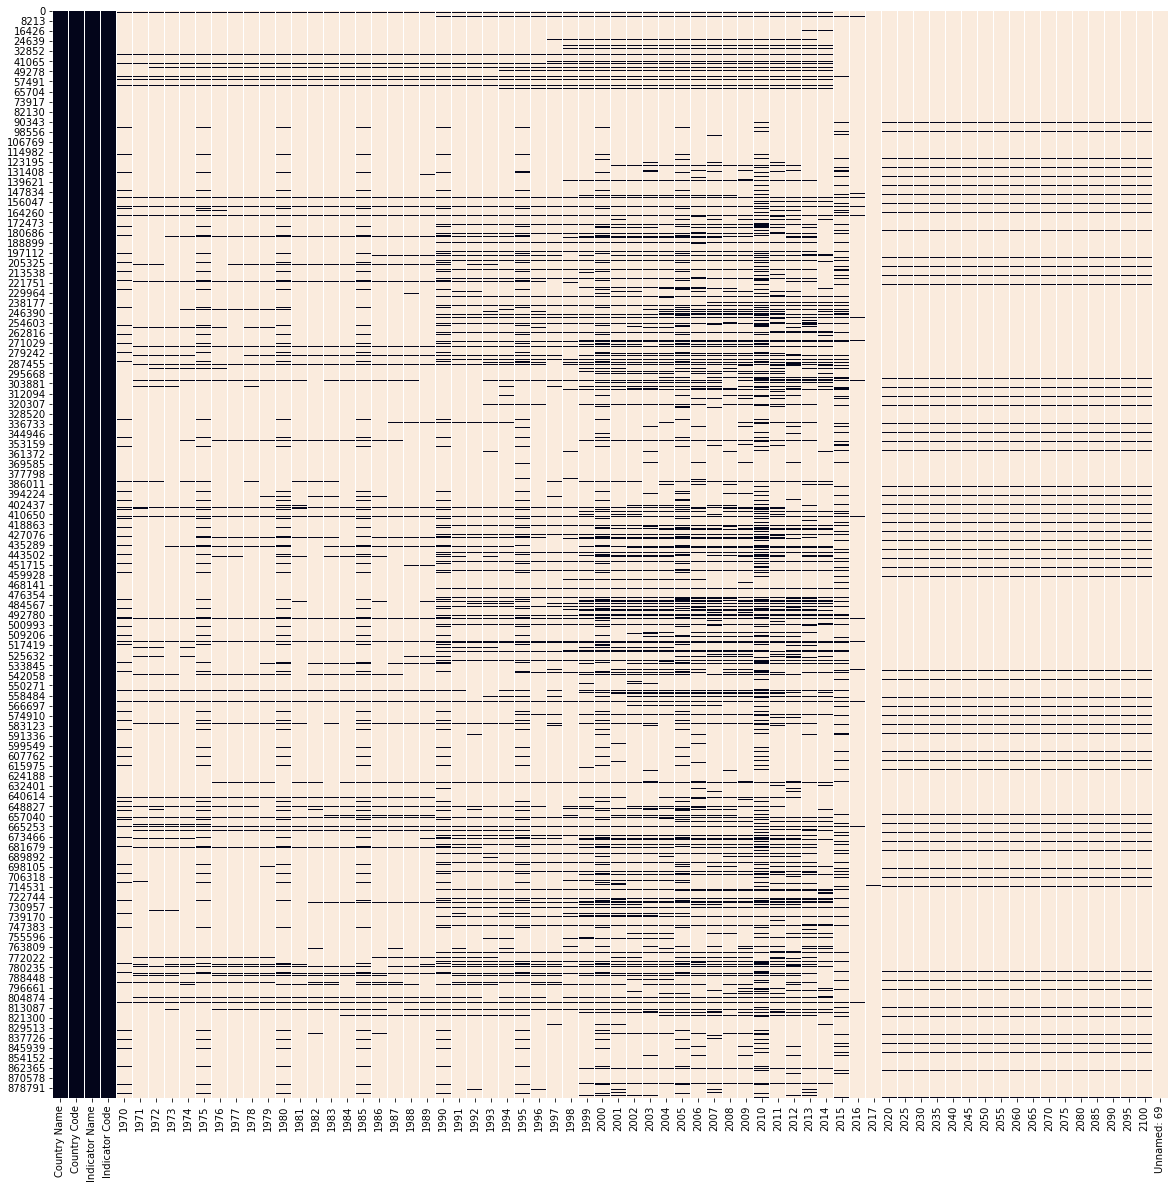

In [31]:


import seaborn as sns

plt.figure(figsize=(20,20))

sns.heatmap(edStatData.isna(), cbar=False)

Il y a des périodes avec quasi exclusivement de NA. Calculons le pourcentage de NA pour chaque période:   

In [32]:
pourcentage = {}
for col in edStatData.columns:
    pourcentage[col] = edStatData[col].isna().sum()/edStatData.shape[0]
for k, v in sorted(pourcentage.items(), key=lambda x: x[1]):
    print(f'{k:-<50} {v}')

Country Name-------------------------------------- 0.0
Country Code-------------------------------------- 0.0
Indicator Name------------------------------------ 0.0
Indicator Code------------------------------------ 0.0
2010---------------------------------------------- 0.7266503557214211
2005---------------------------------------------- 0.7924210478842749
2000---------------------------------------------- 0.8008005141330207
2012---------------------------------------------- 0.8339620939645744
2011---------------------------------------------- 0.8353737048019573
2009---------------------------------------------- 0.8397754050488765
2006---------------------------------------------- 0.8418003675600104
2013---------------------------------------------- 0.8449607071584003
2007---------------------------------------------- 0.845227921030972
2008---------------------------------------------- 0.8484807143743024
1995---------------------------------------------- 0.8518924830595425
2015-------

La période allant de 2005 à 2015 contient des données plus pertinentes. Tandis que la colonne Unnamed: 69 ne contient aucune donnée Supprimons la:

In [33]:
edStatData = edStatData.drop(columns=['Unnamed: 69'])

Vérifions si le fichier contient des données dupliquées:

In [34]:
edStatData.duplicated().sum()

0

Regroupons les années en décénnie pour une meilleur analyse:

In [35]:
#edStatData = edStatData_copy
edStatData_copy = edStatData.copy()

edStatData['1970s'] = edStatData[[str(annee) for annee in range(1970,1980)]].mean(axis=1)
edStatData['1980s'] = edStatData[[str(annee) for annee in range(1980,1990)]].mean(axis=1)
edStatData['1990s'] = edStatData[[str(annee) for annee in range(1990,2000)]].mean(axis=1)
edStatData['2000s'] = edStatData[[str(annee) for annee in range(2000,2010)]].mean(axis=1)
edStatData['2010s'] = edStatData[[str(annee) for annee in [2010,2011,2012,2013,2014,2015,2016,2017]]].mean(axis=1)
edStatData['2020s'] = edStatData[[str(annee) for annee in [2020,2025]]].mean(axis=1)
edStatData['2030s'] = edStatData[[str(annee) for annee in [2030,2035]]].mean(axis=1)
edStatData['2040s'] = edStatData[[str(annee) for annee in [2040,2045]]].mean(axis=1)
edStatData['2050s'] = edStatData[[str(annee) for annee in [2050,2055]]].mean(axis=1)
edStatData['2060s'] = edStatData[[str(annee) for annee in [2060,2065]]].mean(axis=1)
edStatData['2070s'] = edStatData[[str(annee) for annee in [2070,2075]]].mean(axis=1)
edStatData['2080s'] = edStatData[[str(annee) for annee in [2080,2085]]].mean(axis=1)
edStatData['2090s'] = edStatData[[str(annee) for annee in [2090,2095]]].mean(axis=1)
edStatData['2100s'] = edStatData['2100']

In [36]:
edStatData = edStatData.drop(columns=['1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977', '1978',
       '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986', '1987',
       '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995', '1996',
       '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005',
       '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014',
       '2015', '2016', '2017', '2020', '2025', '2030', '2035', '2040', '2045',
       '2050', '2055', '2060', '2065', '2070', '2075', '2080', '2085', '2090',
       '2095', '2100'])

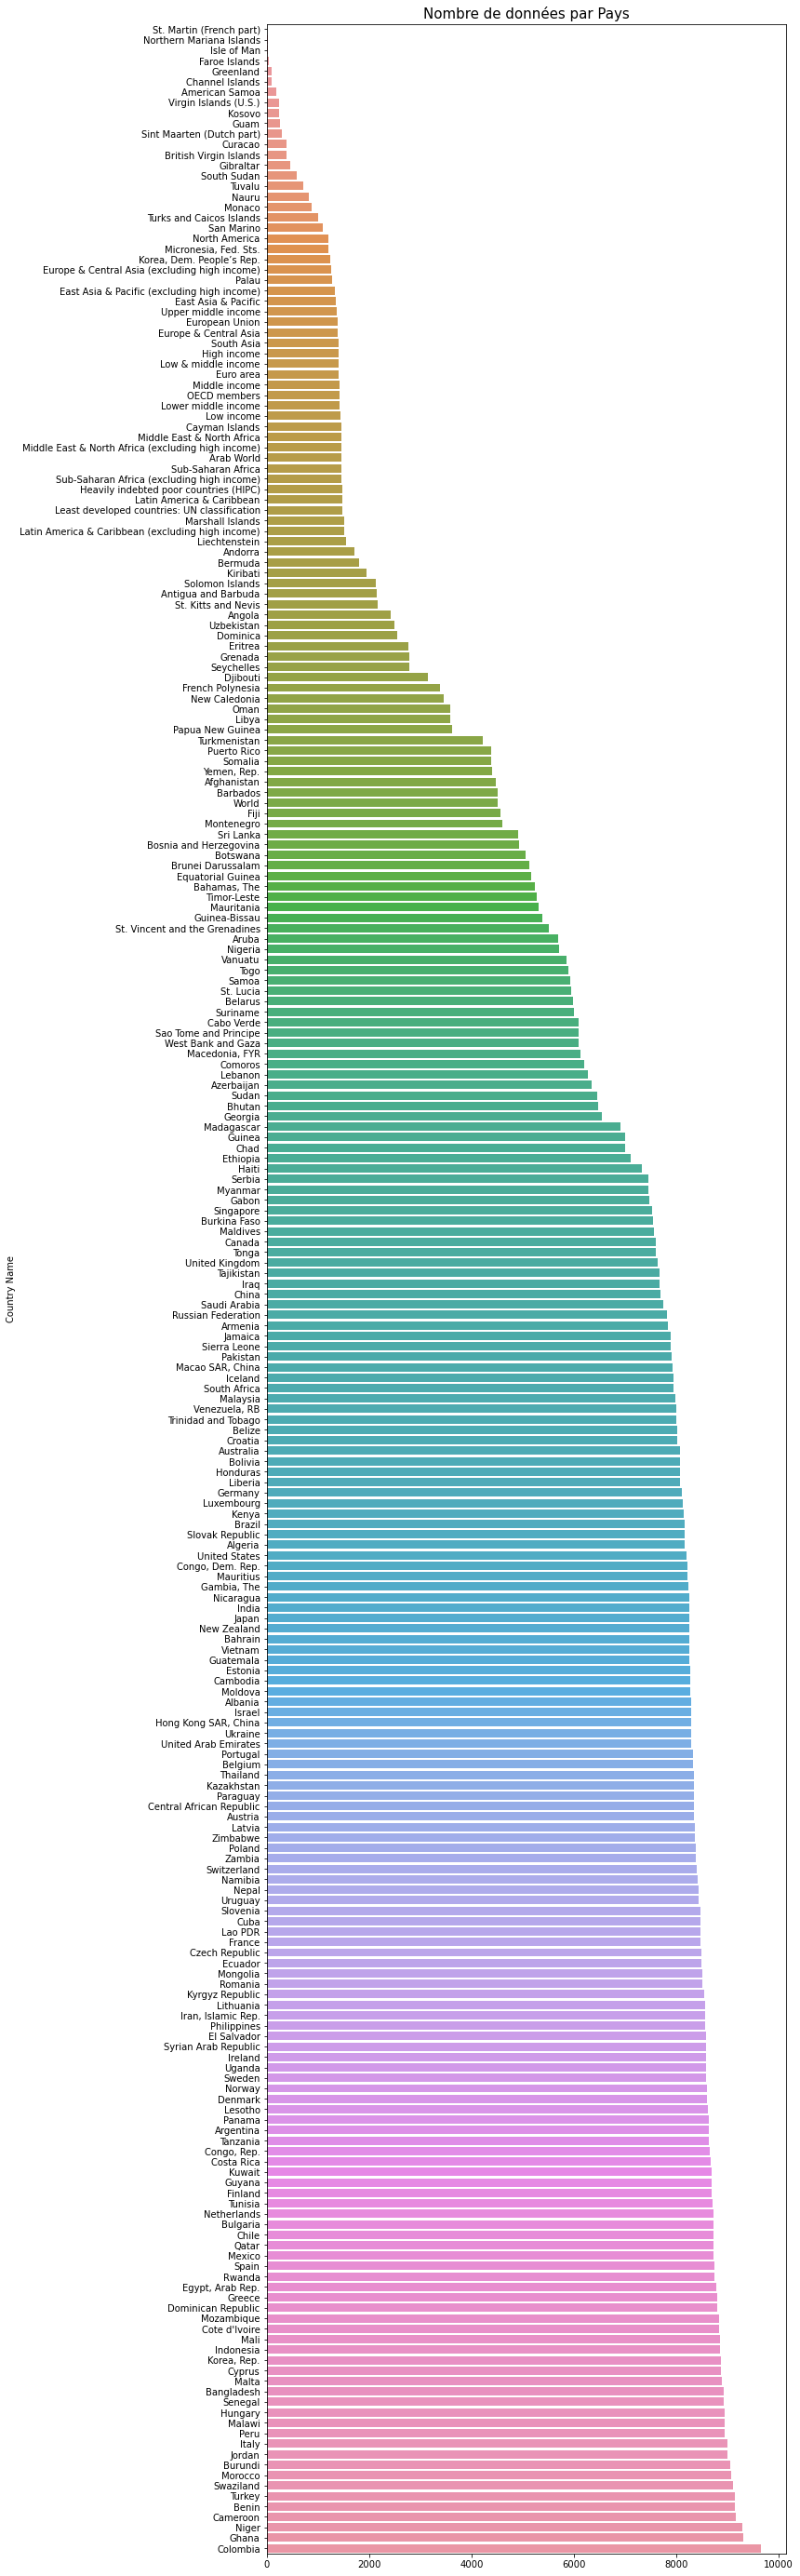

In [37]:
plt.figure(figsize=(10, 50))
plt.title('Nombre de données par Pays', size=15)
plot = sns.barplot(x = edStatData.groupby('Country Name')[['1970s', '1980s', '1990s', '2000s', '2010s', '2020s', '2030s', '2040s',
       '2050s', '2060s', '2070s', '2080s', '2090s', '2100s']].count().sum(axis=1).sort_values().values, 
                   y = edStatData.groupby('Country Name')[['1970s', '1980s', '1990s', '2000s', '2010s', '2020s', '2030s', '2040s',
       '2050s', '2060s', '2070s', '2080s', '2090s', '2100s']].count().sum(axis=1).sort_values().index)
plt.show()

Les pays pour lesquels on a le moins de données sont les petit pays, les groupes de pays (North America, Europe & Central Asia...) et les nouveaux pays (Kosovo...).

In [38]:
edStatData['Indicator Name'].nunique() * edStatData['Country Name'].nunique() == edStatData.shape[0]

True

On a bien les résultats de chaque indicateur par année pour chaque zone géographique. Confirmons cela en en vérifiant qu'il n'y pas de pays avec un nombre d'indicateurs différent de 3665:

In [39]:
nbreIndicateurParPays = edStatData.groupby('Country Code').count().reset_index()['Indicator Name']
nbreIndicateurParPays[nbreIndicateurParPays != 3665]

Series([], Name: Indicator Name, dtype: int64)

EdStatsData nous donne l'évolution (et prédiction pour les années > 2020) des indicateurs par région. 

**EdStatsFootNote.csv**

In [40]:
edStatsFootNote = pd.read_csv('EdStatsFootNote.csv')

In [41]:
edStatsFootNote.head(5)

CountryCode      SeriesCode    Year          DESCRIPTION  Unnamed: 4
0         ABW  SE.PRE.ENRL.FE  YR2001  Country estimation.         NaN
1         ABW  SE.TER.TCHR.FE  YR2005  Country estimation.         NaN
2         ABW  SE.PRE.TCHR.FE  YR2000  Country estimation.         NaN
3         ABW  SE.SEC.ENRL.GC  YR2004  Country estimation.         NaN
4         ABW     SE.PRE.TCHR  YR2006  Country estimation.         NaN

In [42]:
edStatsFootNote['SeriesCode'].nunique()

1558

In [43]:
edStatsFootNote.shape

(643638, 5)

In [44]:
edStatsFootNote['CountryCode'].nunique()

239

In [45]:
edStatsFootNote['Year'] = edStatsFootNote['Year'].apply(lambda x: x[2:])
edStatsFootNote.head(5)

CountryCode      SeriesCode  Year          DESCRIPTION  Unnamed: 4
0         ABW  SE.PRE.ENRL.FE  2001  Country estimation.         NaN
1         ABW  SE.TER.TCHR.FE  2005  Country estimation.         NaN
2         ABW  SE.PRE.TCHR.FE  2000  Country estimation.         NaN
3         ABW  SE.SEC.ENRL.GC  2004  Country estimation.         NaN
4         ABW     SE.PRE.TCHR  2006  Country estimation.         NaN

In [46]:
edStatsFootNote['Year'].sort_values().unique()

array(['1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977',
       '1978', '1979', '1980', '1981', '1982', '1983', '1984', '1985',
       '1986', '1987', '1988', '1989', '1990', '1991', '1992', '1993',
       '1994', '1995', '1996', '1997', '1998', '1999', '2000', '2001',
       '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009',
       '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017',
       '2020', '2025', '2030', '2035', '2040', '2045', '2050'],
      dtype=object)

In [47]:
edStatData.columns

Index(['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code',
       '1970s', '1980s', '1990s', '2000s', '2010s', '2020s', '2030s', '2040s',
       '2050s', '2060s', '2070s', '2080s', '2090s', '2100s'],
      dtype='object')

Les années sont les mêmes que celles du fichier edStatsData sans les années > 2050.
Le fichier EdStatsCountry-Series.csv contient les sources par pays. Le fichier edStatsFootNote.csv contient l'année d'origine des données par pays. 

Que signifie la colonne Unnamed:4?

In [48]:
edStatsFootNote[~edStatsFootNote['Unnamed: 4'].isna()]

Empty DataFrame
Columns: [CountryCode, SeriesCode, Year, DESCRIPTION, Unnamed: 4]
Index: []

Cette colonne ne contient ni nom, ni données nous permettant d'éclairer sur son utilité. Supprimons là.

In [49]:
edStatsFootNote = edStatsFootNote.drop(columns=['Unnamed: 4'])

In [50]:
edStatsFootNote.head(5)

CountryCode      SeriesCode  Year          DESCRIPTION
0         ABW  SE.PRE.ENRL.FE  2001  Country estimation.
1         ABW  SE.TER.TCHR.FE  2005  Country estimation.
2         ABW  SE.PRE.TCHR.FE  2000  Country estimation.
3         ABW  SE.SEC.ENRL.GC  2004  Country estimation.
4         ABW     SE.PRE.TCHR  2006  Country estimation.

Regardons s'il y a des NA:

In [51]:
edStatsFootNote.isna().sum()

CountryCode    0
SeriesCode     0
Year           0
DESCRIPTION    0
dtype: int64

Vérifions maintenant les duplicated:

In [52]:
edStatsFootNote.duplicated().sum()

0

Sur ce fichier, il n y a pas de NA. Regardons combien de données a-t-on par année:

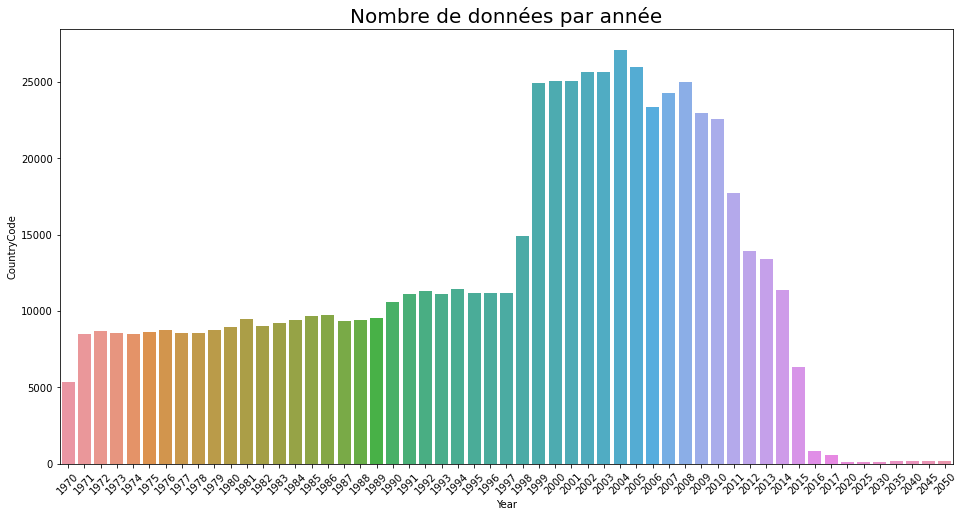

In [53]:
plt.figure(figsize=(16, 8))
plot = sns.barplot(y = 'CountryCode', x='Year', data = edStatsFootNote.groupby('Year').count().reset_index())
plot.set_xticklabels(labels = edStatsFootNote.groupby('Year').count().reset_index()['Year'], rotation=45, size=10)
plt.title('Nombre de données par année', size=20)
plt.show()

**EdStatsSeries.csv**

In [54]:
EdStatsSeries = pd.read_csv('EdStatsSeries.csv')

In [55]:
EdStatsSeries.head(5)

Series Code       Topic  \
0  BAR.NOED.1519.FE.ZS  Attainment   
1     BAR.NOED.1519.ZS  Attainment   
2  BAR.NOED.15UP.FE.ZS  Attainment   
3     BAR.NOED.15UP.ZS  Attainment   
4  BAR.NOED.2024.FE.ZS  Attainment   

                                      Indicator Name  \
0  Barro-Lee: Percentage of female population age...   
1  Barro-Lee: Percentage of population age 15-19 ...   
2  Barro-Lee: Percentage of female population age...   
3  Barro-Lee: Percentage of population age 15+ wi...   
4  Barro-Lee: Percentage of female population age...   

                                    Short definition  \
0  Percentage of female population age 15-19 with...   
1  Percentage of population age 15-19 with no edu...   
2  Percentage of female population age 15+ with n...   
3  Percentage of population age 15+ with no educa...   
4  Percentage of female population age 20-24 with...   

                                     Long definition  Unit of measure  \
0  Percentage of female population age 15-19 with...              NaN   
1  Percentage of population age 15-19 with no edu...              NaN   
2  Percentage of female population age 15+ with n...              NaN   
3  Percentage of population age 15+ with no educa...              NaN   
4  Percentage of female population age 20-24 with...              NaN   

  Periodicity Base Period Other notes Aggregation method  \
0         NaN         NaN         NaN                NaN   
1         NaN         NaN         NaN                NaN   
2         NaN         NaN         NaN                NaN   
3         NaN         NaN         NaN                NaN   
4         NaN         NaN         NaN                NaN   

  Limitations and exceptions  Notes from original source General comments  \
0                        NaN                         NaN              NaN   
1                        NaN                         NaN              NaN   
2                        NaN                         NaN              NaN   
3                        NaN                         NaN              NaN   
4                        NaN                         NaN              NaN   

                                              Source  \
0  Robert J. Barro and Jong-Wha Lee: http://www.b...   
1  Robert J. Barro and Jong-Wha Lee: http://www.b...   
2  Robert J. Barro and Jong-Wha Lee: http://www.b...   
3  Robert J. Barro and Jong-Wha Lee: http://www.b...   
4  Robert J. Barro and Jong-Wha Lee: http://www.b...   

  Statistical concept and methodology Development relevance  \
0                                 NaN                   NaN   
1                                 NaN                   NaN   
2                                 NaN                   NaN   
3                                 NaN                   NaN   
4                                 NaN                   NaN   

  Related source links  Other web links  Related indicators  License Type  \
0                  NaN              NaN                 NaN           NaN   
1                  NaN              NaN                 NaN           NaN   
2                  NaN              NaN                 NaN           NaN   
3                  NaN              NaN                 NaN           NaN   
4                  NaN              NaN                 NaN           NaN   

   Unnamed: 20  
0          NaN  
1          NaN  
2          NaN  
3          NaN  
4          NaN

In [56]:
EdStatsSeries.shape

(3665, 21)

In [57]:
EdStatsSeries['Series Code'].nunique()

3665

On a bien le même nombre d'indicateurs que dans le fichier EdStatsData.csv (colonne 'Indicator Code').

<AxesSubplot:>

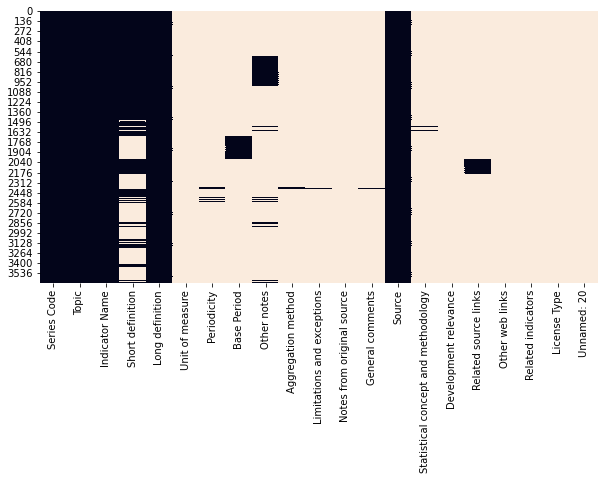

In [58]:
plt.figure(figsize=(10,5))
sns.heatmap(EdStatsSeries.isna(), cbar=False)

Supprimons les colonnes avec plus de 90% de NA:

In [59]:
EdStatsSeries = EdStatsSeries[EdStatsSeries.columns[EdStatsSeries.isna().sum()/EdStatsSeries.shape[0] < 0.9]]

Le fichier contient il des données dupliquées?

In [60]:
EdStatsSeries.duplicated().sum()

0

In [61]:
EdStatsSeries.head(5)

Series Code       Topic  \
0  BAR.NOED.1519.FE.ZS  Attainment   
1     BAR.NOED.1519.ZS  Attainment   
2  BAR.NOED.15UP.FE.ZS  Attainment   
3     BAR.NOED.15UP.ZS  Attainment   
4  BAR.NOED.2024.FE.ZS  Attainment   

                                      Indicator Name  \
0  Barro-Lee: Percentage of female population age...   
1  Barro-Lee: Percentage of population age 15-19 ...   
2  Barro-Lee: Percentage of female population age...   
3  Barro-Lee: Percentage of population age 15+ wi...   
4  Barro-Lee: Percentage of female population age...   

                                    Short definition  \
0  Percentage of female population age 15-19 with...   
1  Percentage of population age 15-19 with no edu...   
2  Percentage of female population age 15+ with n...   
3  Percentage of population age 15+ with no educa...   
4  Percentage of female population age 20-24 with...   

                                     Long definition Other notes  \
0  Percentage of female population age 15-19 with...         NaN   
1  Percentage of population age 15-19 with no edu...         NaN   
2  Percentage of female population age 15+ with n...         NaN   
3  Percentage of population age 15+ with no educa...         NaN   
4  Percentage of female population age 20-24 with...         NaN   

                                              Source  
0  Robert J. Barro and Jong-Wha Lee: http://www.b...  
1  Robert J. Barro and Jong-Wha Lee: http://www.b...  
2  Robert J. Barro and Jong-Wha Lee: http://www.b...  
3  Robert J. Barro and Jong-Wha Lee: http://www.b...  
4  Robert J. Barro and Jong-Wha Lee: http://www.b...

Nous avons 5 dataframes avec aucun doublon:
    - EdStats_df qui contient des informations globales sur l'économie globale de chaque zone géographique
    - edStatsCountrySeries qui contient les sources d'informations pour chaque zone géographique. Hormis une colonne entièrement vide, pas de NA.
    - EdStatsData qui donne l'évolution des indicateurs pour chaque zone géographique. Il contient énormément de NA. Il y a peut être des indicateurs non pertinents du fait qu'il manque de données.
    - edStatsFootNote informe sur l'année d'origine des données. Une seule colonne ne contenant que des NA. Celle ci a été supprimée.
    - EdStatsSeries contient les descriptions de chaque indicateurs.

****Indicateurs les plus pertinents****

Nous allons travailler avec le Dataframe EdStatData. Jetons d'abord un petit coup d'oeil sur ces indicateurs. 

In [62]:
edStatData['Indicator Name'].unique()

array(['Adjusted net enrolment rate, lower secondary, both sexes (%)',
       'Adjusted net enrolment rate, lower secondary, female (%)',
       'Adjusted net enrolment rate, lower secondary, gender parity index (GPI)',
       ..., 'Youth literacy rate, population 15-24 years, female (%)',
       'Youth literacy rate, population 15-24 years, gender parity index (GPI)',
       'Youth literacy rate, population 15-24 years, male (%)'],
      dtype=object)

On voit que les indicateurs portent sur les inscriptions à l'école (enrolment), l'alphabetisation (literacy)....
Analysons les mot-clés qui reviennent le plus:

In [63]:
liste_mots_indicateurs = []
for indicateur in edStatData['Indicator Name'].unique():
    mots_dans_indicateur = indicateur.split(' ')
    for i in range(len(mots_dans_indicateur)):
        liste_mots_indicateurs.append(mots_dans_indicateur[i])

In [64]:
import nltk
#nltk.download('stopwords')

from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

stop_words = set(stopwords.words('english'))

# Il y a pas mal d'indicateurs par sexes. Pour mieux visualiser les autres, éliminons ceux ci de notre liste de mots.
stop_words.add('sexes')
stop_words.add('female')
stop_words.add('male')
stop_words.add('number')
stop_words.add('(%).')
stop_words.add('(%)')
stop_words.add('age')
stop_words.add('level')
stop_words.add('1')
stop_words.add('2nd')
stop_words.add('-')
stop_words.add('years')
liste_mots_filtres = [w for w in liste_mots_indicateurs  if not w.lower() in stop_words]

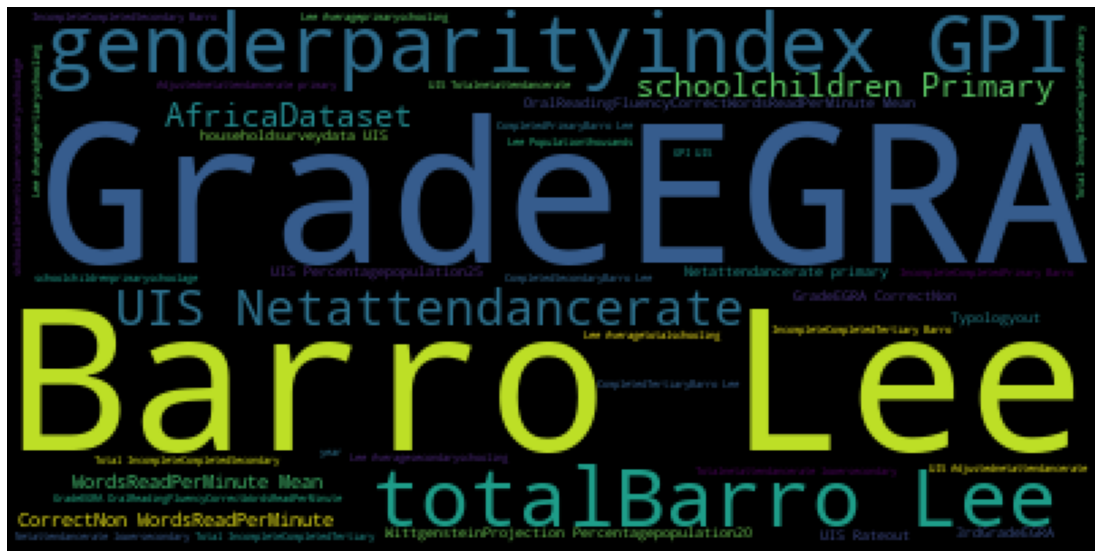

In [65]:
from collections import Counter
dict_frequence_mots = Counter(liste_mots_filtres).most_common(40)


from wordcloud import WordCloud, STOPWORDS

def generate_wordcloud(text): 
    plt.figure( figsize=(20,10) )
    wordcloud = WordCloud(relative_scaling = 0.1,
                          stopwords = stop_words
                          ).generate(text)
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.show()
    
generate_wordcloud("".join(liste_mots_filtres))

Visualisons les 40 mots les plus présents.

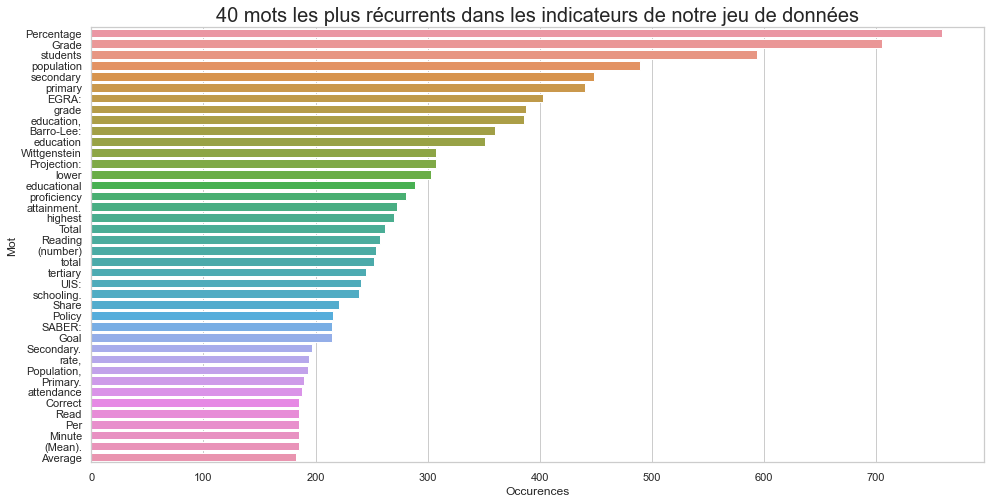

In [66]:
df_mots_indicateurs_populaires = pd.DataFrame(dict_frequence_mots, columns = ['Mot', 'Occurences']).sort_values(by='Occurences', ascending=False)

sns.set(style="whitegrid")
plt.figure(figsize=(16, 8))
sns.barplot(y = 'Mot', x='Occurences', data = df_mots_indicateurs_populaires)
plt.title('40 mots les plus récurrents dans les indicateurs de notre jeu de données', size=20)
plt.show()

Le nuage de mots et le graphique nous permettent de voir qu'on a pas mal d'indicateurs sur le niveau de scolarité  (Barro Lee, Systems Approach for Better Education Results), d'indice de parité entre les sexes (GPI, Wittgenstein Centre Human Capital Data , Wittgenstein Centre Human Capital Data), apprentissage de la lecture (EGRA, reading comprehension, oral reading fluency, wordsReadPerMinute Mean). On remarque aussi le mot 'AfricaDataset'. Quel est cet indicateur? Concerne-t-il uniquement les pays africains?
Regardons d'abord à combien d'indicateurs cela correspond?

In [67]:
#a = edStatData['Indicator Name'].unique()
#a.sort()
#print(a[24:125])
criteria = edStatData['Indicator Name'].map(lambda x : x.startswith('Africa Dataset'))
len(edStatData[criteria]['Indicator Name'].unique())

101

Il y a 101 indicateurs avec ce mot clé. Regardons s'il y a beaucoup de NA pour cet indicateur:

<AxesSubplot:>

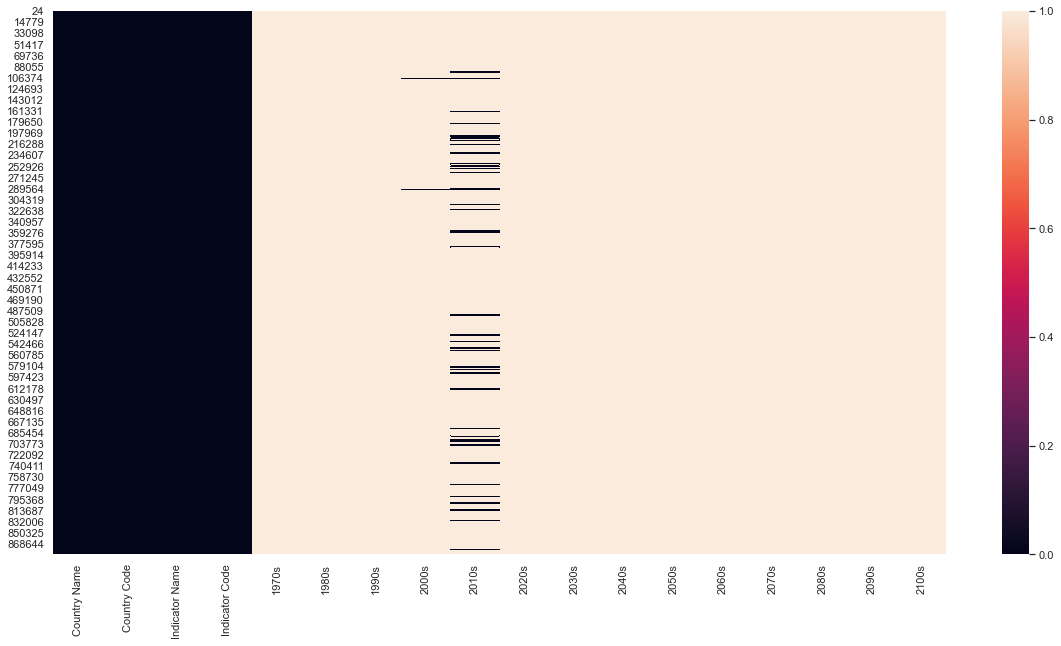

In [68]:
plt.figure(figsize=(20,10))
sns.heatmap(edStatData[criteria].isna())

Ce groupe d'indicateurs contient très peu de données. L'une des idées pour filtrer les indicateurs peut être de choisir ceux étant les plus pertinents.
Pour cela, concentrons nous sur la décennie 2010. Quels sont les indicateurs avec le plus de données à partir de 2010?

In [69]:
edStatDataAggrege = edStatData[['Indicator Name', '2010s']].groupby('Indicator Name').count().sort_values(by='2010s',ascending=False)
edStatDataAggrege

2010s
Indicator Name                                           
Population, total                                     240
Population growth (annual %)                          240
GDP per capita (current US$)                          229
GDP at market prices (current US$)                    229
Internet users (per 100 people)                       229
...                                                   ...
EGRA: Listening Comprehension - Share of studen...      0
EGRA: Correct Letter Sounds Read Per Minute (Me...      0
SACMEQ: Mean performance on the reading scale, ...      0
SACMEQ: Mean performance on the reading scale, ...      0
EGRA: Correct Letter Names Read Per Minute (Mea...      0

[3665 rows x 1 columns]

Il y a 2 indicateurs contenant des données pour chaque pays (240).
Regardons de plus près la distribution des données par indicateurs:

C:\Users\Nordine\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='2010s', ylabel='Density'>

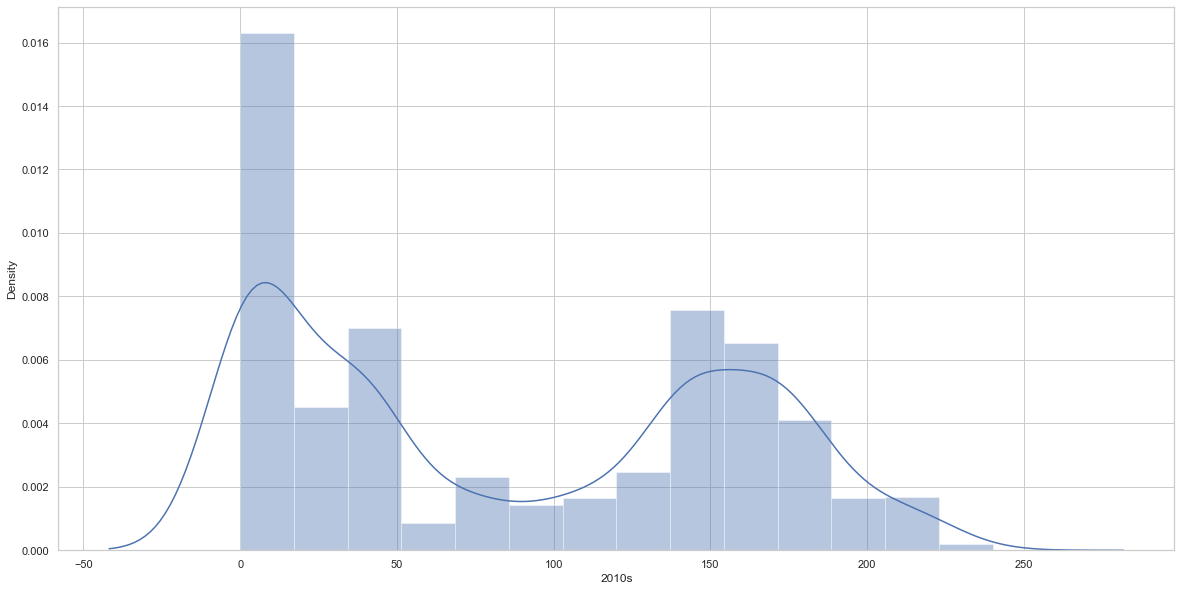

In [70]:
plt.figure(figsize=(20,10))
sns.distplot(edStatDataAggrege['2010s'])

On voit d'après ce graphique qu'il y'a énormément d'indicateurs avec moins de 50 données (donc des données pour moins de 50 pays) et beaucoup d'indicateurs avec des données pour plus de 150 pays.

In [71]:
edStatData['NaN'] = edStatData[['Indicator Code', 'Country Name', '2010s']]['2010s'].isna().astype(int)
print(edStatData[['Indicator Code', 'Country Name', '2010s']].head(2))
print(edStatData[['Indicator Code', 'Country Name', 'NaN']].head(2))

  Indicator Code Country Name  2010s
0     UIS.NERA.2   Arab World    NaN
1   UIS.NERA.2.F   Arab World    NaN
  Indicator Code Country Name  NaN
0     UIS.NERA.2   Arab World    1
1   UIS.NERA.2.F   Arab World    1


In [72]:
edStatDataTableNan = edStatData[['Country Name', 'Indicator Code', 'NaN']].pivot(index='Country Name', columns='Indicator Code', values='NaN')
edStatDataTableNan

Indicator Code                                      BAR.NOED.1519.FE.ZS  \
Country Name                                                              
Afghanistan                                                           0   
Albania                                                               0   
Algeria                                                               0   
American Samoa                                                        1   
Andorra                                                               1   
Angola                                                                1   
Antigua and Barbuda                                                   1   
Arab World                                                            1   
Argentina                                                             0   
Armenia                                                               0   
Aruba                                                                 1   
Australia                                                             0   
Austria                                                               0   
Azerbaijan                                                            1   
Bahamas, The                                                          1   
Bahrain                                                               0   
Bangladesh                                                            0   
Barbados                                                              0   
Belarus                                                               1   
Belgium                                                               0   
Belize                                                                0   
Benin                                                                 0   
Bermuda                                                               1   
Bhutan                                                                1   
Bolivia                                                               0   
Bosnia and Herzegovina                                                1   
Botswana                                                              0   
Brazil                                                                0   
British Virgin Islands                                                1   
Brunei Darussalam                                                     0   
Bulgaria                                                              0   
Burkina Faso                                                          1   
Burundi                                                               0   
Cabo Verde                                                            1   
Cambodia                                                              0   
Cameroon                                                              0   
Canada                                                                0   
Cayman Islands                                                        1   
Central African Republic                                              0   
Chad                                                                  1   
Channel Islands                                                       1   
Chile                                                                 0   
China                                                                 0   
Colombia                                                              0   
Comoros                                                               1   
Congo, Dem. Rep.                                                      0   
Congo, Rep.                                                           0   
Costa Rica                                                            0   
Cote d'Ivoire                                                         0   
Croatia                                                               0   
Cuba                                                                  0   
Curacao                  

<AxesSubplot:xlabel='Indicator Code', ylabel='Country Name'>

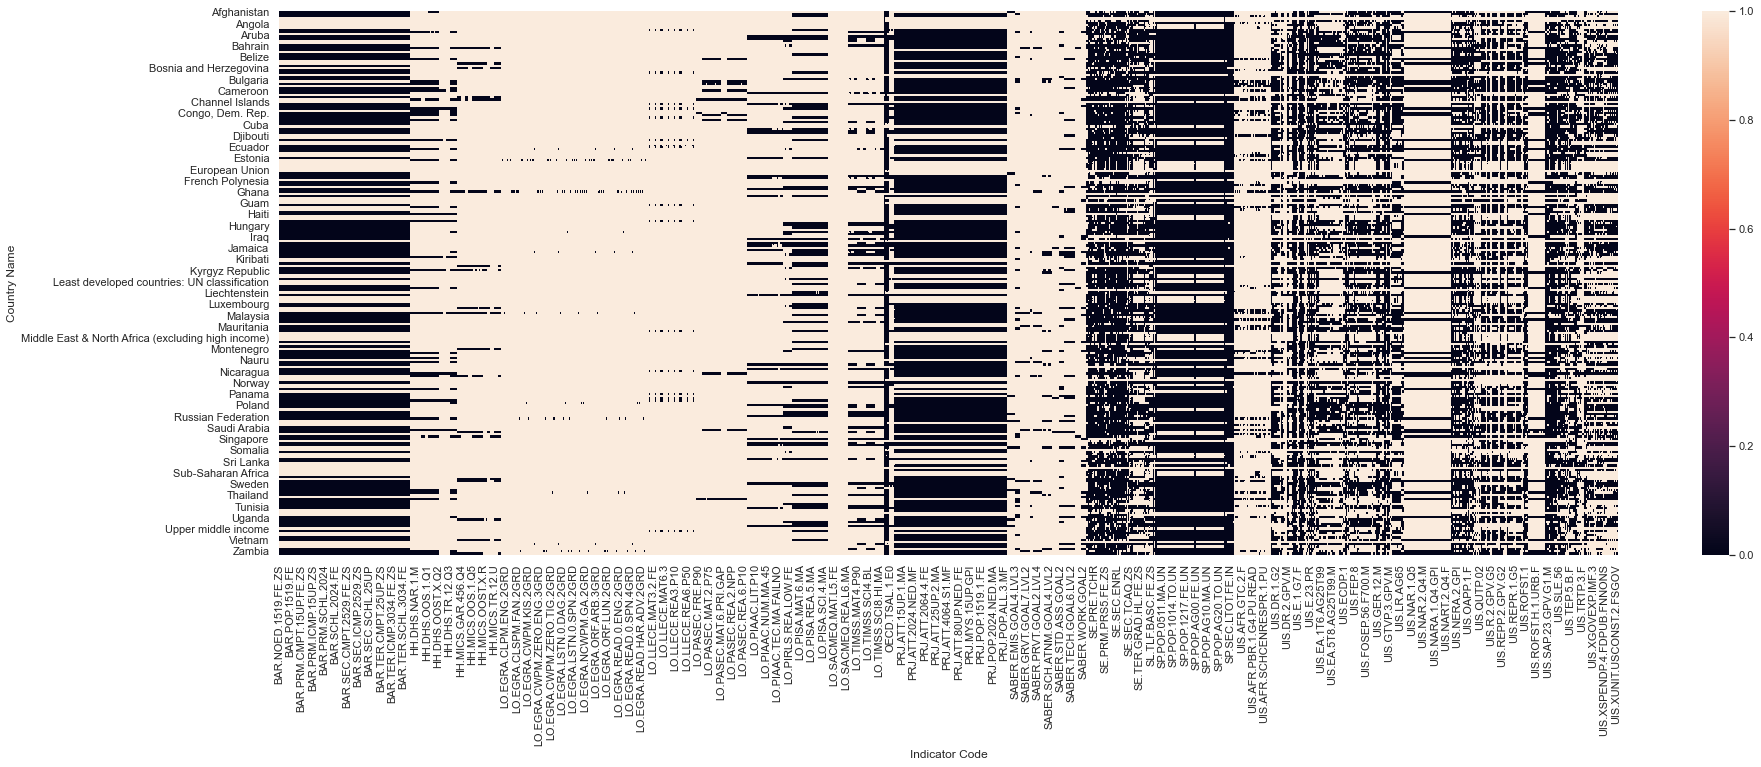

In [73]:
plt.figure(figsize=(30,10))
sns.heatmap(edStatDataTableNan)

On voit que les prefixes des indicateurs contenant le moins de NaN sont (plus de foncés sur la heatmap):
- BAR (Robert J. Barro and Jong-Wha Lee)
- PRJ (Wittgenstein Centre for Demography and Global Human Capital)
- SE  (Unesco institute for Statistics)
- SP  (World Bank and Unesco statistics derived from total population)
- UIS (hors UIS.AFR et UIS.NAR)

A contrario, les préfixes des indicateurs contenant le plus de NaN (plus de claires sur la heatmap):

- LO (EGRA, LLECE, PIAAC, IEA, PISA, SACLEQ)
- SABER (Systems Approach for Better Education Results (SABER), World Bank)
- UIS.AFR (Unesco Institute for Statistics, Africa Dataset). On avait déjà analysé ce groupe d'indicateurs auparavant)
- UIS.NAR (Unesco Institute for Statistics, Net attendance rate)
- HH (DHS Demographic and Health Survey, MICS Multiple Indicator Cluster Surveys)



In [74]:
# Ci dessous le code permettant, se basant sur les data de description des indicateurs,
# de retrouver la description du groupe d'indicateurs
EdStatsSeries[EdStatsSeries['Series Code'].str.startswith('HH')]['Source'].unique()

array(['Demographic and Health Surveys (DHS)',
       'World Bank staff calculations based on Multiple Indicator Cluster Survey (MICS) data',
       'Multiple Indicator Cluster Surveys (MICS)'], dtype=object)

L'analyse que l'on vient d'effectuer se repose sur le nombre de données par indicateurs par pays. En combinant ces informations avec le besoin du client, nous pouvons choisir nos indicateurs.
Le site https://datatopics.worldbank.org/education/indicators nous permet d'avoir une vue des indicateurs par domaine (early childhood , primary, secondary....)

Essayons d'identifier les indicateurs les plus pertinents pour notre analyse. EdTech propose des formations en ligne. 
Il serait déjà utile de choisir des indicateurs nous donnant des informations sur l'utilisation d'internet pour chaque pays et sur le nombre d'étudiants et lycéens.
La formation ayant un cout, les indicateurs informant sur les dépenses effectuées par le gouvernement serait utile.

La colonne Topic du dataframe EdStatsSeries nous informe sur la catégorie des indicateurs.

In [75]:
EdStatsSeries['Topic'].unique()

array(['Attainment', 'Education Equality',
       'Infrastructure: Communications', 'Learning Outcomes',
       'Economic Policy & Debt: National accounts: US$ at current prices: Aggregate indicators',
       'Economic Policy & Debt: National accounts: US$ at constant 2010 prices: Aggregate indicators',
       'Economic Policy & Debt: Purchasing power parity',
       'Economic Policy & Debt: National accounts: Atlas GNI & GNI per capita',
       'Teachers', 'Education Management Information Systems (SABER)',
       'Early Child Development (SABER)',
       'Engaging the Private Sector (SABER)',
       'School Health and School Feeding (SABER)',
       'School Autonomy and Accountability (SABER)',
       'School Finance (SABER)', 'Student Assessment (SABER)',
       'Teachers (SABER)', 'Tertiary Education (SABER)',
       'Workforce Development (SABER)', 'Literacy', 'Background',
       'Primary', 'Secondary', 'Tertiary', 'Early Childhood Education',
       'Pre-Primary', 'Expenditures'

Pour l'utilisation d'internet, le topic 'Infrastructure: Communications' nous donne nos indicateurs.

In [76]:
EdStatsSeries[EdStatsSeries['Topic'] == 'Infrastructure: Communications']

Series Code                           Topic  \
610  IT.CMP.PCMP.P2  Infrastructure: Communications   
611  IT.NET.USER.P2  Infrastructure: Communications   

                          Indicator Name Short definition  \
610  Personal computers (per 100 people)              NaN   
611      Internet users (per 100 people)              NaN   

                                       Long definition Other notes  \
610  Personal computers are self-contained computer...         NaN   
611  Internet users are individuals who have used t...         NaN   

                                                Source  
610  International Telecommunication Union, World T...  
611  International Telecommunication Union, World T...

Concernant les dépenses effectuées pour l'enseignement, le topic 'Expenditure' nous donne nos indicateurs:

In [77]:
print(EdStatsSeries[EdStatsSeries['Topic'] == 'Expenditures']['Series Code'])
print(EdStatsSeries[EdStatsSeries['Topic'] == 'Expenditures']['Series Code'].nunique())

2373                SE.XPD.CUR.TOTL.ZS
2374                 SE.XPD.PRIM.PC.ZS
2375                    SE.XPD.PRIM.ZS
2376                 SE.XPD.SECO.PC.ZS
2377                    SE.XPD.SECO.ZS
2378                 SE.XPD.TERT.PC.ZS
2379                    SE.XPD.TERT.ZS
2380                 SE.XPD.TOTL.GB.ZS
2381                 SE.XPD.TOTL.GD.ZS
3581                  UIS.XGDP.0.FSGOV
3582    UIS.XGDP.0.FSgov.FDinstadm.FFd
3583                  UIS.XGDP.1.FSGOV
3584    UIS.XGDP.1.FSgov.FDinstadm.FFd
3585                 UIS.XGDP.23.FSGOV
3586              UIS.XGDP.2T4.V.FSGOV
3587                  UIS.XGDP.4.FSGOV
3588    UIS.XGDP.4.FSGOV.FDINSTADM.FFD
3589                 UIS.XGDP.56.FSGOV
3590      UIS.XGDP.FSgov.FDinstadm.FFd
3591                 UIS.XGOVEXP.IMF.0
3592                 UIS.XGOVEXP.IMF.1
3593                 UIS.XGOVEXP.IMF.2
3594                UIS.XGOVEXP.IMF.23
3595             UIS.XGOVEXP.IMF.2T4.V
3596                 UIS.XGOVEXP.IMF.3
3597                 UIS.

Enfin le topic Tertiary nous donne les indicateurs sur les personnes inscrites à des établissements post secondaires

In [78]:
EdStatsSeries[EdStatsSeries['Topic'] == 'Tertiary']

Series Code     Topic  \
2220      SE.ENR.TERT.FM.ZS  Tertiary   
2284            SE.SCH.LIFE  Tertiary   
2285         SE.SCH.LIFE.FE  Tertiary   
2286         SE.SCH.LIFE.MA  Tertiary   
2329      SE.TER.CMPL.FE.ZS  Tertiary   
2330      SE.TER.CMPL.MA.ZS  Tertiary   
2331         SE.TER.CMPL.ZS  Tertiary   
2332            SE.TER.ENRL  Tertiary   
2333         SE.TER.ENRL.FE  Tertiary   
2334      SE.TER.ENRL.FE.ZS  Tertiary   
2335            SE.TER.ENRR  Tertiary   
2336         SE.TER.ENRR.FE  Tertiary   
2337         SE.TER.ENRR.MA  Tertiary   
2338            SE.TER.GRAD  Tertiary   
2339   SE.TER.GRAD.AG.FE.ZS  Tertiary   
2340      SE.TER.GRAD.AG.ZS  Tertiary   
2341   SE.TER.GRAD.ED.FE.ZS  Tertiary   
2342      SE.TER.GRAD.ED.ZS  Tertiary   
2343   SE.TER.GRAD.EN.FE.ZS  Tertiary   
2344      SE.TER.GRAD.EN.ZS  Tertiary   
2345         SE.TER.GRAD.FE  Tertiary   
2346   SE.TER.GRAD.FE.AG.ZS  Tertiary   
2347   SE.TER.GRAD.FE.ED.ZS  Tertiary   
2348   SE.TER.GRAD.FE.EN.ZS  Tertiary   
2349   SE.TER.GRAD.FE.HL.ZS  Tertiary   
2350   SE.TER.GRAD.FE.HU.ZS  Tertiary   
2351   SE.TER.GRAD.FE.OT.ZS  Tertiary   
2352   SE.TER.GRAD.FE.SC.ZS  Tertiary   
2353   SE.TER.GRAD.FE.SS.ZS  Tertiary   
2354   SE.TER.GRAD.FE.SV.ZS  Tertiary   
2355      SE.TER.GRAD.FE.ZS  Tertiary   
2356   SE.TER.GRAD.HL.FE.ZS  Tertiary   
2357      SE.TER.GRAD.HL.ZS  Tertiary   
2358   SE.TER.GRAD.HU.FE.ZS  Tertiary   
2359      SE.TER.GRAD.HU.ZS  Tertiary   
2360   SE.TER.GRAD.OT.FE.ZS  Tertiary   
2361      SE.TER.GRAD.OT.ZS  Tertiary   
2362   SE.TER.GRAD.SC.FE.ZS  Tertiary   
2363      SE.TER.GRAD.SC.ZS  Tertiary   
2364   SE.TER.GRAD.SS.FE.ZS  Tertiary   
2365      SE.TER.GRAD.SS.ZS  Tertiary   
2366   SE.TER.GRAD.SV.FE.ZS  Tertiary   
2367      SE.TER.GRAD.SV.ZS  Tertiary   
2368         SE.TER.PRIV.ZS  Tertiary   
2372            SE.TOT.ENRR  Tertiary   
2835                UIS.E.4  Tertiary   
2836              UIS.E.4.F  Tertiary   
2839             UIS.E.4.Pu  Tertiary   
2840           UIS.E.4.Pu.F  Tertiary   
2841              UIS.E.5.B  Tertiary   
2842            UIS.E.5.B.F  Tertiary   
2843                UIS.E.6  Tertiary   
2844              UIS.E.6.F  Tertiary   
2845                UIS.E.7  Tertiary   
2846              UIS.E.7.F  Tertiary   
2847                UIS.E.8  Tertiary   
2848              UIS.E.8.F  Tertiary   
2929              UIS.FEP.4  Tertiary   
2932            UIS.FEP.5.B  Tertiary   
2933        UIS.FEP.56.F140  Tertiary   
2934        UIS.FEP.56.F200  Tertiary   
2935        UIS.FEP.56.F300  Tertiary   
2936        UIS.FEP.56.F400  Tertiary   
2937        UIS.FEP.56.F500  Tertiary   
2938        UIS.FEP.56.F600  Tertiary   
2939        UIS.FEP.56.F700  Tertiary   
2940        UIS.FEP.56.F800  Tertiary   
2941     UIS.FEP.56.FOREIGN  Tertiary   
2942         UIS.FEP.56.FUK  Tertiary   
2943              UIS.FEP.6  Tertiary   
2944              UIS.FEP.7  Tertiary   
2945              UIS.FEP.8  Tertiary   
2946            UIS.FGP.5.B  Tertiary   
2947     UIS.FGP.56.F400500  Tertiary   
2948  UIS.FGP.56.FNON400500  Tertiary   
2949              UIS.FGP.6  Tertiary   
2950              UIS.FGP.7  Tertiary   
2951              UIS.FGP.8  Tertiary   
2956      UIS.FOSEP.56.F140  Tertiary   
2957    UIS.FOSEP.56.F140.F  Tertiary   
2958    UIS.FOSEP.56.F140.M  Tertiary   
2959      UIS.FOSEP.56.F200  Tertiary   
2960    UIS.FOSEP.56.F200.F  Tertiary   
2961    UIS.FOSEP.56.F200.M  Tertiary   
2962      UIS.FOSEP.56.F300  Tertiary   
2963    UIS.FOSEP.56.F300.F  Tertiary   
2964    UIS.FOSEP.56.F300.M  Tertiary   
2965      UIS.FOSEP.56.F400  Tertiary   
2966    UIS.FOSEP.56.F400.F  Tertiary   
2967    UIS.FOSEP.56.F400.M  Tertiary   
2968      UIS.FOSEP.56.F500  Tertiary   
2969    UIS.FOSEP.56.F500.F  Tertiary   
2970    UIS.FOSEP.56.F500.M  Tertiary   
2971      UIS.FOSEP.56.F600  Tertiary   
2972    UIS.FOSEP.56.F600.F  Tertiary   
2973    UIS.FOSEP.56.F600.M  Tertiary   
2974      UIS.FOSEP.56.F700  Tertiary  

Nous aurons besoin d'au moins un indicateur pour chaque catégorie. Créons donc 3 listes d'indicateurs pour chaque catégorie.

In [79]:
liste_indicateurs_infrastructure = []
liste_indicateurs_depenses = []
liste_indicateurs_tertiaire = []
for indicateur in EdStatsSeries[EdStatsSeries['Topic'] == 'Infrastructure: Communications']['Series Code'].values:
    liste_indicateurs_infrastructure.append(indicateur)
for indicateur in EdStatsSeries[EdStatsSeries['Topic'] == 'Expenditures']['Series Code'].values:
    liste_indicateurs_depenses.append(indicateur)
for indicateur in EdStatsSeries[EdStatsSeries['Topic'] == 'Tertiary']['Series Code'].values:
    liste_indicateurs_tertiaire.append(indicateur)

In [80]:
len(liste_indicateurs_infrastructure) + len(liste_indicateurs_depenses) + len(liste_indicateurs_tertiaire)

253

Il n'y a plus que 253 indicateurs. Essayons de voir s'ils sont tous pertinent en regardant ceux qui contiennent le plus de données.

In [81]:
edStatDataTableNan_infrastructure = edStatData[edStatData['Indicator Code'].isin(liste_indicateurs_infrastructure)][['Country Name', 'Indicator Code', 'NaN']].pivot(index='Country Name', columns='Indicator Code', values='NaN')

<AxesSubplot:xlabel='Indicator Code', ylabel='Country Name'>

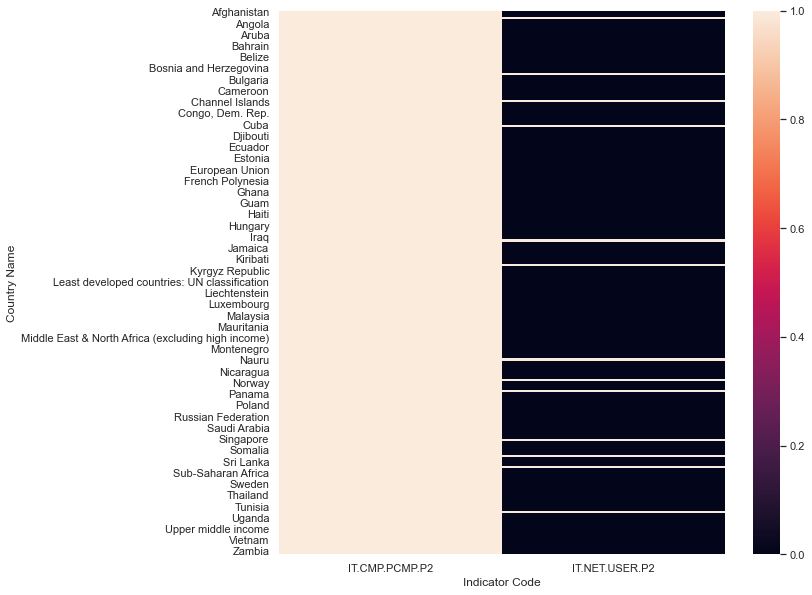

In [82]:
plt.figure(figsize=(10,10))
sns.heatmap(edStatDataTableNan_infrastructure)

On voit que l'indicateur IT.CMP.PCMP.P2 ne contient pas de données. Retirons le de la liste.

In [83]:
liste_indicateurs_infrastructure.remove('IT.CMP.PCMP.P2')
liste_indicateurs_infrastructure

['IT.NET.USER.P2']

Regardons le nombre de données par indicateurs de dépenses.

In [84]:
edStatDataAggrege_depenses = edStatData[edStatData['Indicator Code'].isin(liste_indicateurs_depenses)][['Indicator Code', '2010s']].groupby('Indicator Code').count().sort_values(by='2010s',ascending=False)
edStatDataAggrege_depenses

2010s
Indicator Code                       
SE.XPD.TOTL.GD.ZS                 157
SE.XPD.TOTL.GB.ZS                 149
SE.XPD.TERT.ZS                    147
SE.XPD.SECO.ZS                    144
UIS.XGDP.23.FSGOV                 144
SE.XPD.PRIM.PC.ZS                 142
XGDP.23.FSGOV.FDINSTADM.FFD       140
SE.XPD.SECO.PC.ZS                 139
UIS.XSPENDP.23.FDPUB.FNCUR        139
SE.XPD.PRIM.ZS                    138
UIS.XSPENDP.1.FDPUB.FNCUR         137
UIS.XGDP.56.FSGOV                 137
UIS.XGOVEXP.IMF.23                136
UIS.XGDP.1.FSGOV                  135
SE.XPD.CUR.TOTL.ZS                134
UIS.XSPENDP.1.FDPUB.FNS           134
UIS.XSPENDP.23.FDPUB.FNS          134
UIS.XGOVEXP.IMF.56                133
SE.XPD.TERT.PC.ZS                 133
XGDP.56.FSGOV.FDINSTADM.FFD       132
UIS.XGOVEXP.IMF.1                 128
UIS.XUNIT.US.23.FSGOV             127
UIS.XUNIT.US.1.FSGOV              127
UIS.XSPENDP.FDPUB.FNS             124
UIS.XUNIT.PPP.1.FSGOV             124
UIS.XUNIT.USCONST.23.FSGOV        124
UIS.XUNIT.PPP.23.FSGOV            124
UIS.XSPENDP.56.FDPUB.FNCUR        124
UIS.XGDP.0.FSGOV                  124
UIS.XUNIT.USCONST.1.FSGOV         123
UIS.XUNIT.PPPCONST.23.FSGOV       122
UIS.XUNIT.US.56.FSGOV             121
UIS.XUNIT.PPPCONST.1.FSGOV        121
UIS.XUNIT.PPP.56.FSGOV            120
UIS.XSPENDP.23.FDPUB.FNNONS       120
UIS.XUNIT.USCONST.56.FSGOV        120
UIS.XGOVEXP.IMF.0                 119
UIS.XSPENDP.23.FDPUB.FNCAP        119
UIS.XUNIT.PPPCONST.56.FSGOV       118
UIS.XSPENDP.FDPUB.FNCAP           116
UIS.XSPENDP.1.FDPUB.FNNONS        115
UIS.XSPENDP.1.FDPUB.FNCAP         112
UIS.XGOVEXP.IMF.3                 109
UIS.XSPENDP.56.FDPUB.FNS          109
UIS.XSPENDP.3.FDPUB.FNCUR         107
UIS.XSPENDP.FDPUB.FNNONS          107
UIS.XSPENDP.0.FDPUB.FNCUR         105
UIS.XPUBP.3                       104
UIS.XUNIT.GDPCAP.3.FSGOV          104
UIS.XSPENDP.3.FDPUB.FNS           103
UIS.XGOVEXP.IMF.2                 103
UIS.XUNIT.US.3.FSGOV              102
UIS.XUNIT.GDPCAP.2.FSGOV          102
UIS.XSPENDP.3.FDPUB.FNNONS        102
UIS.XUNIT.USCONST.3.FSGOV         100
UIS.XPUBP.2                       100
UIS.XSPENDP.2.FDPUB.FNCUR         100
UIS.XUNIT.PPP.3.FSGOV             100
UIS.XUNIT.US.2.FSGOV              100
UIS.XSPENDP.0.FDPUB.FNS            99
UIS.XSPENDP.2.FDPUB.FNS            99
UIS.XUNIT.USCONST.2.FSGOV          98
UIS.XSPENDP.2.FDPUB.FNNONS         98
UIS.XUNIT.PPP.2.FSGOV              98
UIS.XUNIT.PPPCONST.3.FSGOV         98
UIS.XSPENDP.3.FDPUB.FNCAP          97
UIS.XSPENDP.0.FDPUB.FNNONS         97
UIS.XUNIT.PPPCONST.2.FSGOV         96
UIS.XSPENDP.2.FDPUB.FNCAP          93
UIS.XSPENDP.0.FDPUB.FNCAP          89
UIS.XPUBP.UK                       86
UIS.XGDP.4.FSGOV                   78
UIS.XGOVEXP.IMF.4                  74
UIS.XGDP.4.FSGOV.FDINSTADM.FFD     73
UIS.XSPENDP.4.FDPUB.FNCUR          64
UIS.XUNIT.GDPCAP.4.FSGOV           53
UIS.XSPENDP.4.FDPUB.FNS            53
UIS.XUNIT.US.4.FSGOV               52
UIS.XSPENDP.4.FDPUB.FNNONS         52
UIS.XUNIT.USCONST.4.FSGOV          52
UIS.XSPENDP.4.FDPUB.FNCAP          52
UIS.XUNIT.PPPCONST.4.FSGOV         51
UIS.XUNIT.PPP.4.FSGOV              51
UIS.XGOVEXP.IMF.2T4.V              49
UIS.XGDP.2T4.V.FSGOV               48
UIS.XPUBP.2T4.V                    48

Il y a 241 pays/zones. Eliminons les indicateurs ayant des informations pour moins de 60% de données.

In [85]:
liste_indicateurs_depenses = edStatDataAggrege_depenses[edStatDataAggrege_depenses['2010s'] > 144].index.values
len(liste_indicateurs_depenses)

3

Regardons ces 3 indicateurs pour vérifier s'ils sont pertinents.

In [86]:
EdStatsSeries[EdStatsSeries['Series Code'].isin(liste_indicateurs_depenses)][['Series Code','Indicator Name']]

Series Code                                     Indicator Name
2379     SE.XPD.TERT.ZS  Expenditure on tertiary as % of government exp...
2380  SE.XPD.TOTL.GB.ZS  Expenditure on education as % of total governm...
2381  SE.XPD.TOTL.GD.ZS  Government expenditure on education as % of GD...

Ces 3 indicateurs ne sont en fait que 3 vues différentes: le pourcentage de dépenses par rapport aux dépenses gouvernementales sur l'éducation, le pourcentage par rapport aux dépenses totales gouvernementales et le pourcentage par rapport au PIB.
Le deuxième indicateur est suffisant pour notre analyse.

In [87]:
liste_indicateurs_depenses = np.delete(liste_indicateurs_depenses, [0,2])
liste_indicateurs_depenses

array(['SE.XPD.TOTL.GB.ZS'], dtype=object)

Nombre de données par indicateurs sur l'enseignement tertiaire:

In [88]:
edStatDataAggrege_tertiaire = edStatData[edStatData['Indicator Code'].isin(liste_indicateurs_tertiaire)][['Indicator Code','2010s']].groupby('Indicator Code').count().sort_values(by='2010s',ascending=False)
edStatDataAggrege_tertiaire

2010s
Indicator Code              
UIS.GOER.56              211
SE.TER.ENRL              197
SE.TER.ENRL.FE.ZS        197
SE.TER.ENRL.FE           197
SE.TER.ENRR              190
SE.ENR.TERT.FM.ZS        189
SE.TER.ENRR.MA           189
SE.TER.ENRR.FE           189
UIS.SLE.56               188
UIS.SLE.56.M             186
UIS.SLE.56.GPI           186
UIS.SLE.56.F             186
UIS.OMR.56               183
SE.TOT.ENRR              177
SE.SCH.LIFE              177
SE.SCH.LIFE.MA           175
SE.SCH.LIFE.FE           175
UIS.TE_100000.56         163
UIS.TEP.5.B              161
UIS.TE_100000.56.F       161
UIS.FEP.5.B              161
UIS.E.5.B.F              161
UIS.E.5.B                161
UIS.TE_100000.56.M       161
UIS.MS.56.T              156
UIS.E.8.F                154
UIS.E.8                  154
UIS.MSEP.56              154
UIS.FEP.8                154
UIS.TEP.8                153
SE.TER.PRIV.ZS           149
SE.TER.GRAD              145
UIS.E.6                  143
UIS.TEP.6                143
UIS.FEP.6                142
UIS.E.6.F                142
UIS.E.7                  141
UIS.TEP.7                141
UIS.FEP.7                140
SE.TER.GRAD.FE.ZS        140
UIS.E.7.F                140
SE.TER.GRAD.FE           140
UIS.MS.56.F              139
UIS.FEP.56.FOREIGN       138
UIS.E.4                  137
UIS.MSEP.56.F            137
UIS.MSEP.56.M            136
UIS.TEP.5.B.F            136
UIS.TEP.5.B.M            136
UIS.FOSEP.56.F300        135
UIS.FEP.56.F300          135
UIS.FEP.4                134
UIS.E.4.F                134
UIS.FEP.56.F200          134
UIS.FEP.56.F140          134
UIS.FEP.56.F500          133
UIS.FOSEP.56.F200        133
UIS.FOSEP.56.F140        133
UIS.FEP.56.F700          133
UIS.FOSEP.56.F300.M      132
UIS.FOSEP.56.F300.F      132
UIS.FOSEP.56.F500        131
UIS.FOSEP.56.F140.F      130
UIS.FOSEP.56.F400        130
UIS.MENF.56              130
UIS.FOSEP.56.F700        130
UIS.FOSEP.56.F200.F      130
UIS.FOSEP.56.F140.M      130
UIS.FOSEP.56.F500.M      129
UIS.FOSEP.56.F500.F      129
UIS.FOSEP.56.F200.M      129
UIS.FEP.56.F400          129
UIS.TEP.8.M              128
UIS.TEP.8.F              128
UIS.FOSEP.56.F700.M      128
UIS.FOSEP.56.F700.F      128
UIS.FOSEP.56.F400.M      127
UIS.FOSEP.56.F400.F      127
UIS.MENFR.56             127
SE.TER.GRAD.OT.ZS        126
SE.TER.GRAD.ED.ZS        125
SE.TER.GRAD.FE.ED.ZS     125
UIS.FGP.56.FNON400500    124
SE.TER.GRAD.FE.SS.ZS     124
UIS.FOSEP.56.F800        123
SE.TER.GRAD.FE.HU.ZS     123
UIS.FEP.56.F600          123
UIS.FOSEP.56.F600        122
UIS.FOSGP.56.F300.M      122
SE.TER.GRAD.FE.HL.ZS     122
UIS.FEP.56.F800          122
SE.TER.GRAD.OT.FE.ZS     122
UIS.FGP.56.F400500       122
UIS.G.5.B.T              121
SE.TER.GRAD.FE.SC.ZS     121
SE.TER.GRAD.FE.EN.ZS     121
UIS.FOSGP.56.F200.M      120
UIS.FOSGP.56.F140.M      120
UIS.FOSEP.56.F800.M      120
SE.TER.GRAD.ED.FE.ZS     120
UIS.FOSEP.56.F600.M      120
UIS.FOSEP.56.F800.F      119
UIS.FOSEP.56.F600.F      119
UIS.FOSGP.56.F500.M      119
SE.TER.GRAD.SV.ZS        118
UIS.FOSGP.56.F400.M      118
UIS.TEP.6.M              117
UIS.TEP.6.F              117
SE.TER.GRAD.HL.ZS        116
SE.TER.GRAD.HU.ZS        116
UIS.FOSGP.56.F700.M      116
UIS.TEP.7.M              115
SE.TER.CMPL.ZS           115
UIS.TEP.7.F              115
UIS.FGP.5.B              115
SE.TER.GRAD.SS.ZS        115
UIS.G.5.B.F              115
SE.TER.CMPL.MA.ZS        114
SE.TER.GRAD.SV.FE.ZS     114
SE.TER.CMPL.FE.ZS        113
SE.TER.GRAD.AG.ZS        113
SE.TER.GRAD.SC.ZS        113
SE.TER.GRAD.EN.ZS        113
UIS.GGR.5.A.GPI          111
SE.TER.GRAD.HL.FE.ZS     111
SE.TER.GRAD.FE.AG.ZS     110
SE.TER.GRAD.HU.FE.ZS     110
SE.TER.GRAD.SS.FE.ZS     109
SE.TER.GRAD.EN.FE.ZS     108
UIS.G.8.T                108
SE.TER.GRAD.SC.FE.ZS     108
SE.TER.GRAD.AG.FE.ZS     108
SE.TER.GRAD.FE.SV.ZS     108
UIS.FOSGP.56.F600.M      107
UIS.FOSGP.56.F800.M      106
UIS.FGP.8                105
UIS.G.8.F            

In [89]:
liste_indicateurs_tertiaire= edStatDataAggrege_tertiaire[edStatDataAggrege_tertiaire['2010s'] > 145].index.values
len(liste_indicateurs_tertiaire)

31

Filtrons maintenant en fonction de la pertinence métier des indicateurs:

In [90]:
EdStatsSeries[EdStatsSeries['Series Code'].isin(liste_indicateurs_tertiaire)][['Series Code','Indicator Name']].values

array([['SE.ENR.TERT.FM.ZS',
        'Gross enrolment ratio, tertiary, gender parity index (GPI)'],
       ['SE.SCH.LIFE',
        'School life expectancy, primary to tertiary, both sexes (years)'],
       ['SE.SCH.LIFE.FE',
        'School life expectancy, primary to tertiary, female (years)'],
       ['SE.SCH.LIFE.MA',
        'School life expectancy, primary to tertiary, male (years)'],
       ['SE.TER.ENRL',
        'Enrolment in tertiary education, all programmes, both sexes (number)'],
       ['SE.TER.ENRL.FE',
        'Enrolment in tertiary education, all programmes, female (number)'],
       ['SE.TER.ENRL.FE.ZS',
        'Percentage of students in tertiary education who are female (%)'],
       ['SE.TER.ENRR', 'Gross enrolment ratio, tertiary, both sexes (%)'],
       ['SE.TER.ENRR.FE', 'Gross enrolment ratio, tertiary, female (%)'],
       ['SE.TER.ENRR.MA', 'Gross enrolment ratio, tertiary, male (%)'],
       ['SE.TER.PRIV.ZS',
        'Percentage of enrolment in tertiary edu

In [91]:
EdStatsSeries[EdStatsSeries['Series Code'].isin(liste_indicateurs_tertiaire)][EdStatsSeries['Indicator Name'].str.contains('Enrolment')][['Series Code', 'Indicator Name']].values

<ipython-input-91-c4abee148cae>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  EdStatsSeries[EdStatsSeries['Series Code'].isin(liste_indicateurs_tertiaire)][EdStatsSeries['Indicator Name'].str.contains('Enrolment')][['Series Code', 'Indicator Name']].values


array([['SE.TER.ENRL',
        'Enrolment in tertiary education, all programmes, both sexes (number)'],
       ['SE.TER.ENRL.FE',
        'Enrolment in tertiary education, all programmes, female (number)'],
       ['UIS.E.5.B',
        'Enrolment in tertiary education, ISCED 5 programmes, both sexes (number)'],
       ['UIS.E.5.B.F',
        'Enrolment in tertiary education, ISCED 5 programmes, female (number)'],
       ['UIS.E.8',
        'Enrolment in tertiary education, ISCED 8 programmes, both sexes (number)'],
       ['UIS.E.8.F',
        'Enrolment in tertiary education, ISCED 8 programmes, female (number)'],
       ['UIS.TE_100000.56',
        'Enrolment in tertiary education per 100,000 inhabitants, both sexes'],
       ['UIS.TE_100000.56.F',
        'Enrolment in tertiary education per 100,000 inhabitants, female'],
       ['UIS.TE_100000.56.M',
        'Enrolment in tertiary education per 100,000 inhabitants, male']],
      dtype=object)

Notre analyse ne va pas porter sur un programme précis. Nous allons donc ne retenir que l'indicateur SE.TER.ENRL

In [92]:
liste_indicateurs_tertiaire = ['SE.TER.ENRL']

In [118]:
liste_indicateurs = []
liste_indicateurs_pop = ['SP.POP.1524.TO.UN']
for indicateur in liste_indicateurs_infrastructure:
    liste_indicateurs.append(indicateur)
for indicateur in liste_indicateurs_depenses:
    liste_indicateurs.append(indicateur)
for indicateur in liste_indicateurs_tertiaire:
    liste_indicateurs.append(indicateur)
for indicateur in liste_indicateurs_pop:
    liste_indicateurs.append(indicateur)    


In [120]:
#edStatSeries[edStatSeriesliste_indicateurs 
pd.set_option('max_colwidth', None)
EdStatsSeries[EdStatsSeries['Series Code'].isin(liste_indicateurs)][['Series Code','Long definition']]

Series Code  \
611      IT.NET.USER.P2   
2332        SE.TER.ENRL   
2380  SE.XPD.TOTL.GB.ZS   
2506  SP.POP.1524.TO.UN   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                      Long definition  
611                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                             Internet users are individuals who have used the Internet (from any location) in the last 3 months. The Internet can be used via a computer, mobile phone, personal digital assistant, games machine, digital TV etc.  
2332                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                     The total number of students enrolled at public and private tertiary education institutions.  
2380  Total general (local, regional and central) government expenditure on education (current, capital, and transfers), expressed as a percentage of total general government expenditure on all sectors (including health, education, social services, etc.). It includes expenditure funded by transfers from international sources to government. Public education expenditure includes spending by local/municipal, regional and national governments (

Nous avons réduit la liste des indicateurs à 4.

****Ordre de grandeurs des indicateurs statistiques classiques****

Ajoutons la colonne Region à notre data edStatData en mergant avec edStatsCountry.

In [95]:
edStatData = edStatData.merge(right = edStats_df[['Country Code', 'Region']], 
                  on='Country Code', how='left')
#edStatData.drop(columns=['Region_x', 'Region_y'])

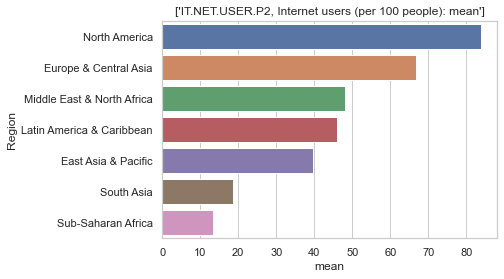

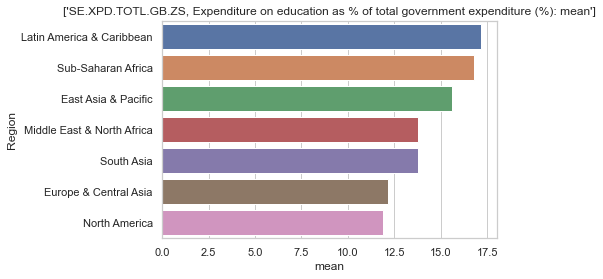

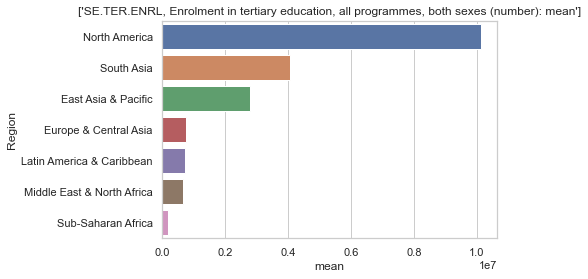

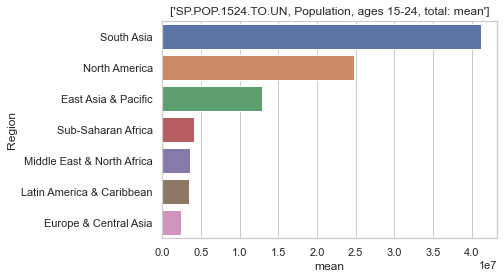

In [96]:
for indicateur in liste_indicateurs:    
    edStatDataAggrege_mean= edStatData[edStatData['Indicator Code'] == indicateur][[ 'Region','2010s']].groupby(['Region']).mean().sort_values(by='2010s',ascending=False).reset_index().rename(columns={"2010s": "mean"})
    titre1 = indicateur + ', ' + EdStatsSeries[EdStatsSeries['Series Code'] == indicateur]['Indicator Name'].values + ': mean'
    plt.title(titre1)
    sns.barplot(x=edStatDataAggrege_mean['mean'], y = edStatDataAggrege_mean['Region'] )
    plt.show()
    

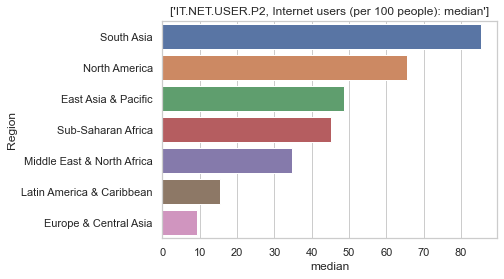

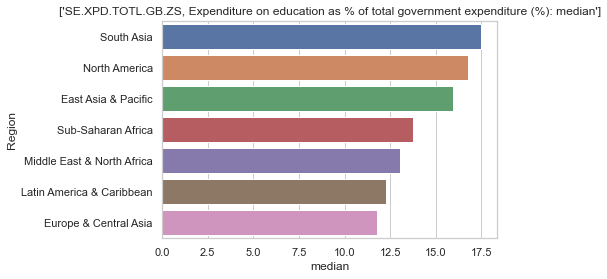

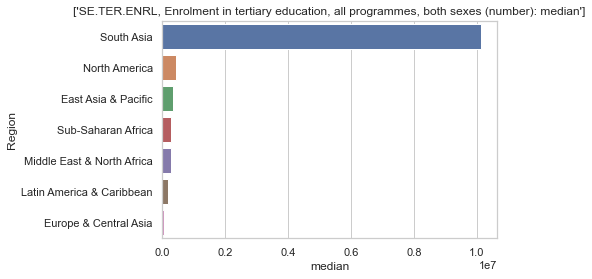

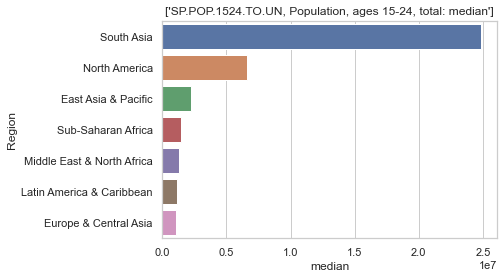

In [97]:
for indicateur in liste_indicateurs:    
    edStatDataAggrege_median = edStatData[edStatData['Indicator Code'] == indicateur][[ 'Region','2010s']].groupby(['Region']).median().sort_values(by='2010s',ascending=False).reset_index().rename(columns={"2010s": "median"})
    titre2 = indicateur + ', ' + EdStatsSeries[EdStatsSeries['Series Code'] == indicateur]['Indicator Name'].values + ': median'    
    plt.title(titre2)
    sns.barplot(x=edStatDataAggrege_median['median'], y = edStatDataAggrege_mean['Region'] )    
    plt.show()

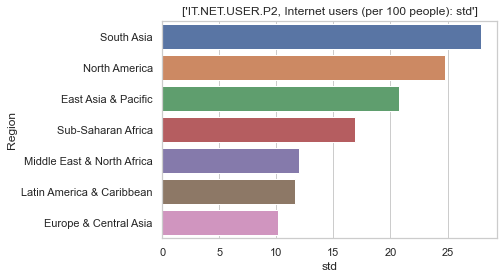

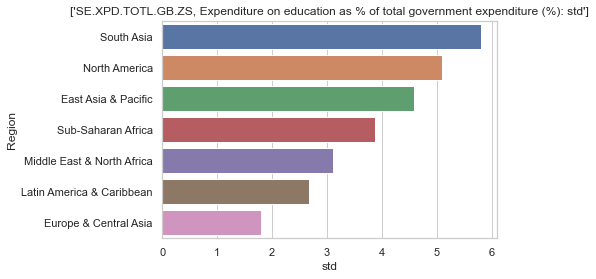

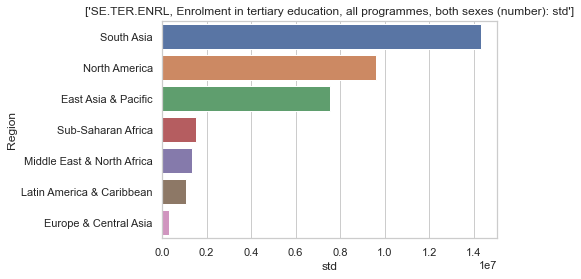

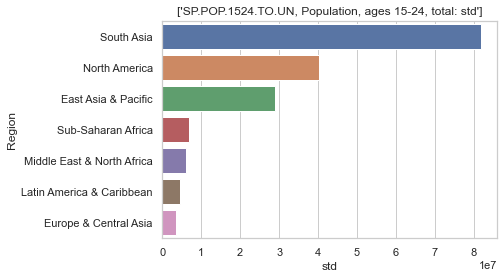

In [98]:
for indicateur in liste_indicateurs:    
    edStatDataAggrege_std = edStatData[edStatData['Indicator Code'] == indicateur][[ 'Region','2010s']].groupby(['Region']).std().sort_values(by='2010s',ascending=False).reset_index().rename(columns={"2010s": "std"})
    titre3 = indicateur + ', ' + EdStatsSeries[EdStatsSeries['Series Code'] == indicateur]['Indicator Name'].values + ': std'
    plt.title(titre3)
    sns.barplot(x=edStatDataAggrege_std['std'], y = edStatDataAggrege_mean['Region'])
    plt.show()

In [99]:
 
edStatDataAggregePop = edStatData[edStatData['Indicator Code'].isin(liste_indicateurs_pop)][[ 'Country Name','2010s', 'Region']].sort_values(by='2010s',ascending=False).reset_index().rename(columns={"2010s": "Population"})
edStatDataAggregeInt = edStatData[edStatData['Indicator Code'].isin(liste_indicateurs_infrastructure)][[ 'Country Name','2010s']].sort_values(by='2010s',ascending=False).reset_index().rename(columns={"2010s": "Internet"})
edStatDataAggregeDep = edStatData[edStatData['Indicator Code'].isin(liste_indicateurs_depenses)][[ 'Country Name','2010s']].sort_values(by='2010s',ascending=False).reset_index().rename(columns={"2010s": "Depenses"})
edStatDataAggregeter = edStatData[edStatData['Indicator Code'].isin(liste_indicateurs_tertiaire)][[ 'Country Name','2010s']].sort_values(by='2010s',ascending=False).reset_index().rename(columns={"2010s": "Inscription"})


Pour avoir une idée précise, on pourrait effectuer une première liste de clients potentiels, en regardant les pays avec une population jeune importante voire très importante combiné à un nombre d'internautes élevés voire très élevés:

In [100]:
edStatDataAggrege = edStatDataAggregeInt.merge(right = edStatDataAggregePop[['Country Name', 'Population', 'Region']], 
                  on='Country Name', how='left')
edStatDataAggrege = edStatDataAggrege.merge(right = edStatDataAggregeDep[['Country Name', 'Depenses']], 
                  on='Country Name', how='left')
edStatDataAggrege = edStatDataAggrege.merge(right = edStatDataAggregeter[['Country Name', 'Inscription']], 
                  on='Country Name', how='left')



In [101]:
edStatDataAggrege = edStatDataAggrege.drop(columns=['index'])
edStatDataAggrege

Country Name   Internet  \
0                                              Iceland  96.509472   
1                                               Norway  95.284552   
2                                           Luxembourg  93.696330   
3                                              Denmark  93.529716   
4                                              Bermuda  93.181273   
5                                               Sweden  92.195800   
6                                          Netherlands  91.822593   
7                                        Liechtenstein  91.164686   
8                                              Andorra  90.453580   
9                                       United Kingdom  89.441457   
10                                             Finland  88.235796   
11                                              Monaco  87.710211   
12                                       Faroe Islands  87.696578   
13                                         Korea, Rep.  86.603018   
14                                         Switzerland  86.416807   
15                                              Canada  85.361429   
16                                               Japan  85.306401   
17                                             Germany  84.745271   
18                                             Bahrain  84.568775   
19                                United Arab Emirates  84.357143   
20                                         New Zealand  84.043935   
21                                             Belgium  82.295655   
22                                           Australia  82.105767   
23                                              France  81.789500   
24                                               Qatar  81.609421   
25                                             Estonia  81.269271   
26                                             Austria  80.545441   
27                                               Aruba  78.554812   
28                                Hong Kong SAR, China  77.630710   
29                                     Slovak Republic  77.547598   
30                                             Ireland  77.412824   
31                                         High income  76.846043   
32                                           Singapore  76.277750   
33                                           Euro area  75.580997   
34                                              Latvia  74.492039   
35                                       North America  74.260452   
36                                      Czech Republic  73.318880   
37                                       United States  73.035771   
38                                      European Union  72.846488   
39                                               Spain  72.825133   
40                                              Israel  72.796118   
41                                              Kuwait  72.524246   
42                                      Cayman Islands  72.380849   
43                                           Gibraltar  72.365368   
44                                            Barbados  72.202771   
45                                             Hungary  71.998741   
46                                            Slovenia  71.221825   
47                                        OECD members  71.110135   
48                                               Malta  70.682413   
49                                        Bahamas, The  69.524029   
50                                           Lithuania  68.475359   
51                                 St. Kitts and Nevis  67.902525   
52                                    Macao SAR, China  67.362116   
53                                         Puerto Rico  66.746086   
54                                           Greenland  65.785332   
55                               Europe & Central Asia  65.538253   
56                                                Guam  65.442023   
57                                      

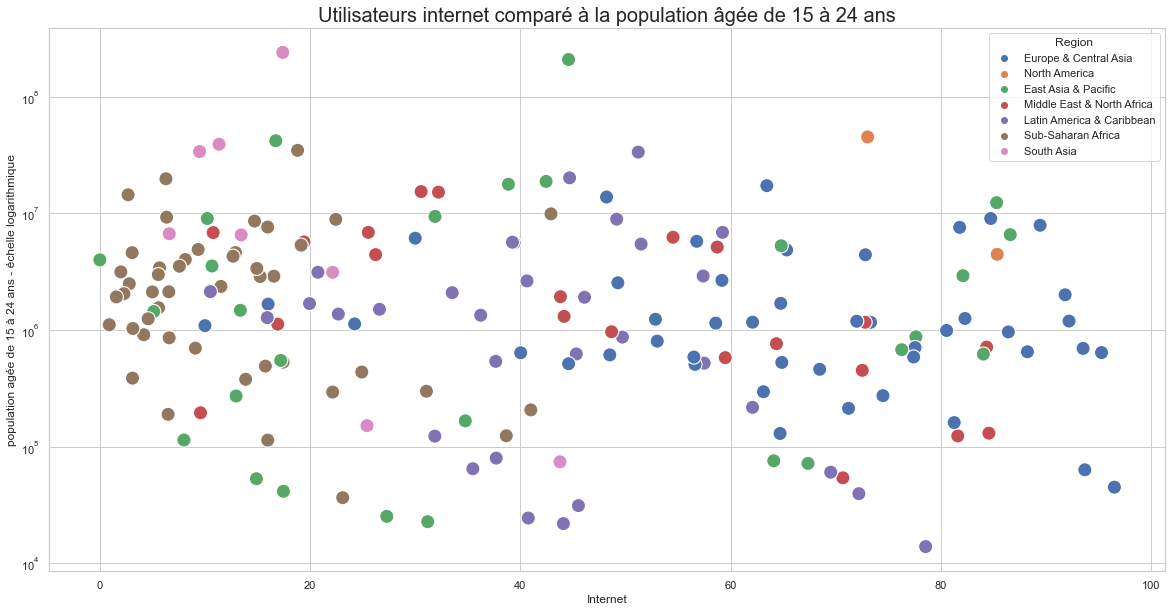

In [102]:
plt.figure(figsize=(20,10))
import matplotlib.patches as patches


ax = plt.gca()
sns.scatterplot(y=edStatDataAggrege['Population'].values,x=edStatDataAggrege['Internet'], hue=edStatDataAggrege['Region'], s=200 )
#a = sns.lmplot(y=edStatDataAggrege['Population'].values,x=edStatDataAggrege['Internet'], data=elps,hue=edStatDataAggrege['Region'],  fit_reg=False, size=10)

ax.set_yscale('log')
plt.ylabel('population agée de 15 à 24 ans - échelle logarithmique')
plt.title('Utilisateurs internet comparé à la population âgée de 15 à 24 ans', size=20)
plt.show()

Les pays candidats se trouvent dans la partie supérieure droite du graphique. Il y a une majorité de pays issues de la région 'Europe et Asie centrale'. 
On peut aussi croiser le nombre d'inscrits avec la population entre 15 et 24 ans.

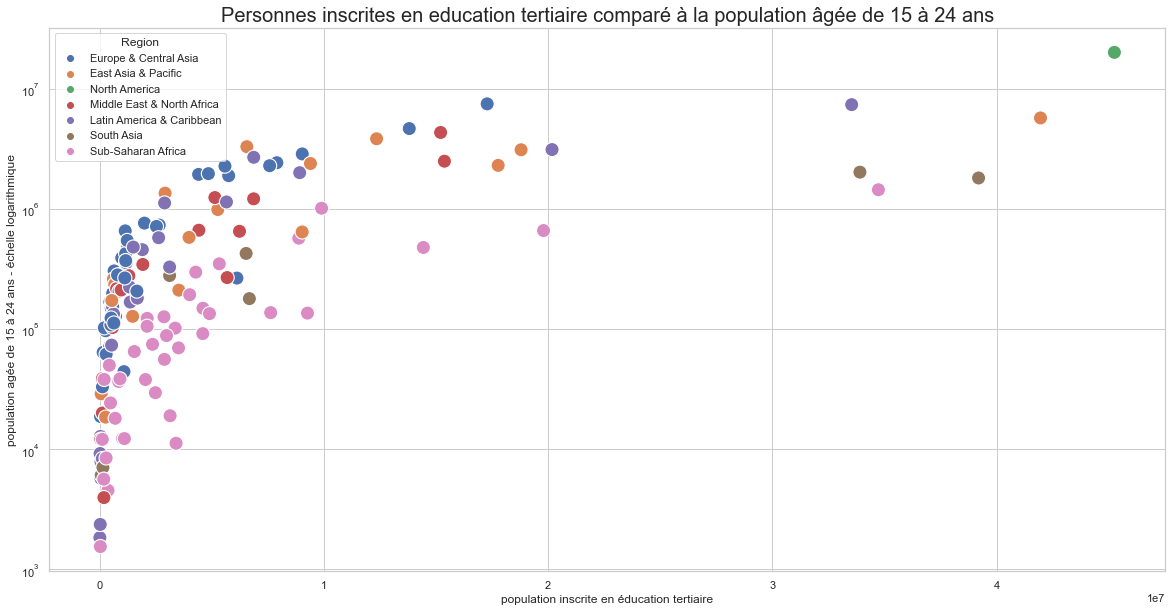

In [103]:
plt.figure(figsize=(20,10))
ax = plt.gca()
sns.scatterplot(x=edStatDataAggrege[edStatDataAggrege['Population'] < 100000000]['Population'].values
                ,y=edStatDataAggrege[edStatDataAggrege['Population'] < 100000000]['Inscription'].values, 
                hue=edStatDataAggrege[edStatDataAggrege['Population'] < 100000000]['Region'], s=200 )
ax.set_yscale('log')
plt.xlabel('population inscrite en éducation tertiaire')
plt.ylabel('population agée de 15 à 24 ans - échelle logarithmique')
plt.title('Personnes inscrites en education tertiaire comparé à la population âgée de 15 à 24 ans', size=20)
plt.show()

In [104]:
print('Internet, mediane:',edStatDataAggrege['Internet'].quantile(0.5))
print('Internet, quantile 75%:',edStatDataAggrege['Internet'].quantile(0.75))
print('Population,mediane:',edStatDataAggrege['Population'].quantile(0.5))
print('Population, quantile 75%:',edStatDataAggrege['Population'].quantile(0.75))
print('Dépenses, mediane:',edStatDataAggrege['Depenses'].quantile(0.5))
print('Dépenses, quantile 75%:',edStatDataAggrege['Depenses'].quantile(0.75))
print('Inscription, mediane',edStatDataAggrege['Inscription'].quantile(0.5))
print('Inscription, quantile 75%:',edStatDataAggrege['Inscription'].quantile(0.75))

Internet, mediane: 42.44773194142857
Internet, quantile 75%: 65.33241374857144
Population,mediane: 1306930.5
Population, quantile 75%: 4901291.5
Dépenses, mediane: 14.201422691345226
Dépenses, quantile 75%: 18.355169932047517
Inscription, mediane 246754.5
Inscription, quantile 75%: 1904571.3333333333


En regardant la valeur médiane des indicateurs, on peut considérer qu'une valeur au dela mediane est importante et au delà de 75% est très importante.
Nous allons utiliser ces données pour choisir les pays à fort potentiel.

In [105]:
edStatDataAggregeFiltered = edStatDataAggrege[((edStatDataAggrege['Internet'] > 40) & (edStatDataAggrege['Population']> 4000000) & 
                     (edStatDataAggrege['Inscription'] > 200000))
                     |  ((edStatDataAggrege['Internet'] > 65) & (edStatDataAggrege['Population'] > 1000000) &
                        (edStatDataAggrege['Inscription'] > 200000) )].sort_values(by='Depenses',ascending=False)[:20].sort_values(by='Population', ascending=False)

edStatDataAggregeFiltered['Country Name']

37          United States
89                 Brazil
105                Mexico
64     Russian Federation
97                 Turkey
113          South Africa
17                Germany
93               Colombia
9          United Kingdom
23                 France
71              Argentina
59               Malaysia
57                 Poland
39                  Spain
22              Australia
6             Netherlands
21                Belgium
5                  Sweden
40                 Israel
36         Czech Republic
Name: Country Name, dtype: object

Quels sont les potentiels de chacun de ces pays? Jusqu'ici l'analyse portait uniquement sur l'analyse de la décennie 2010.
Intégrons les prévisions 2020s et 2030s pour avoir une idée du potentiel de ces pays.


In [106]:
data_final = edStatData_copy[edStatData_copy['Country Name'].isin(edStatDataAggregeFiltered['Country Name'].values) & edStatData_copy['Indicator Code'].isin(liste_indicateurs)]

In [107]:
data_final

Country Name Country Code  \
118484           Argentina          ARG   
118504           Argentina          ARG   
118655           Argentina          ARG   
119762           Argentina          ARG   
129479           Australia          AUS   
129499           Australia          AUS   
129650           Australia          AUS   
130757           Australia          AUS   
158799             Belgium          BEL   
158819             Belgium          BEL   
158970             Belgium          BEL   
160077             Belgium          BEL   
188119              Brazil          BRA   
188139              Brazil          BRA   
188290              Brazil          BRA   
189397              Brazil          BRA   
246759            Colombia          COL   
246779            Colombia          COL   
246930            Colombia          COL   
248037            Colombia          COL   
283409      Czech Republic          CZE   
283429      Czech Republic          CZE   
283580      Czech Republic          CZE   
284687      Czech Republic          CZE   
338384              France          FRA   
338404              France          FRA   
338555              France          FRA   
339662              France          FRA   
356709             Germany          DEU   
356729             Germany          DEU   
356880             Germany          DEU   
357987             Germany          DEU   
437339              Israel          ISR   
437359              Israel          ISR   
437510              Israel          ISR   
438617              Israel          ISR   
532629            Malaysia          MYS   
532649            Malaysia          MYS   
532800            Malaysia          MYS   
533907            Malaysia          MYS   
558284              Mexico          MEX   
558304              Mexico          MEX   
558455              Mexico          MEX   
559562              Mexico          MEX   
602264         Netherlands          NLD   
602284         Netherlands          NLD   
602435         Netherlands          NLD   
603542         Netherlands          NLD   
660904              Poland          POL   
660924              Poland          POL   
661075              Poland          POL   
662182              Poland          POL   
679229  Russian Federation          RUS   
679249  Russian Federation          RUS   
679400  Russian Federation          RUS   
680507  Russian Federation          RUS   
737869        South Africa          ZAF   
737889        South Africa          ZAF   
738040        South Africa          ZAF   
739147        South Africa          ZAF   
745199               Spain          ESP   
745219               Spain          ESP   
745370               Spain          ESP   
746477               Spain          ESP   
778184              Sweden          SWE   
778204              Sweden          SWE   
778355              Sweden          SWE   
779462              Sweden          SWE   
818499              Turkey          TUR   
818519              Turkey          TUR   
818670              Turkey          TUR   
819777              Turkey          TUR   
844154      United Kingdom          GBR   
844174      United Kingdom          GBR   
844325      United Kingdom          GBR   
845432      United Kingdom          GBR   
847819       United States          USA   
847839       United States          USA   
847990       United States          USA   
849097       United States          USA   

                                           Indicator Name     Indicator Code  \
118484  Enrolment in tertiary education, all programme...        SE.TER.ENRL   
118504  Expenditure on education as % of total governm...  SE.XPD.TOTL.GB.ZS   
118655                    Internet users (per 100 people)     IT.NET.USER.P2   
119762                      Population, ages 15-24, total  SP.POP.1524.TO.UN   
129479  Enrolment in tertiary education, all programme...        SE.TER.ENRL   
129499  Expenditure on education as % of total gov

In [108]:
data_final_melt = data_final.melt(id_vars = ['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code'], value_vars = ['1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977', '1978',
       '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986', '1987',
       '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995', '1996',
       '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005',
       '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014',
       '2015', '2016', '2017', '2020', '2025', '2030', '2035', '2040', '2045',
       '2050', '2055', '2060', '2065', '2070', '2075', '2080', '2085', '2090',
       '2095', '2100'], var_name = 'Year', value_name = 'Value')

In [109]:
data_final_melt['Year'] = pd.to_numeric(data_final_melt['Year'])
data_final_melt = data_final_melt[data_final_melt['Year'] > 2010]
data_final_melt['Year'] = data_final_melt['Year'].astype(str)

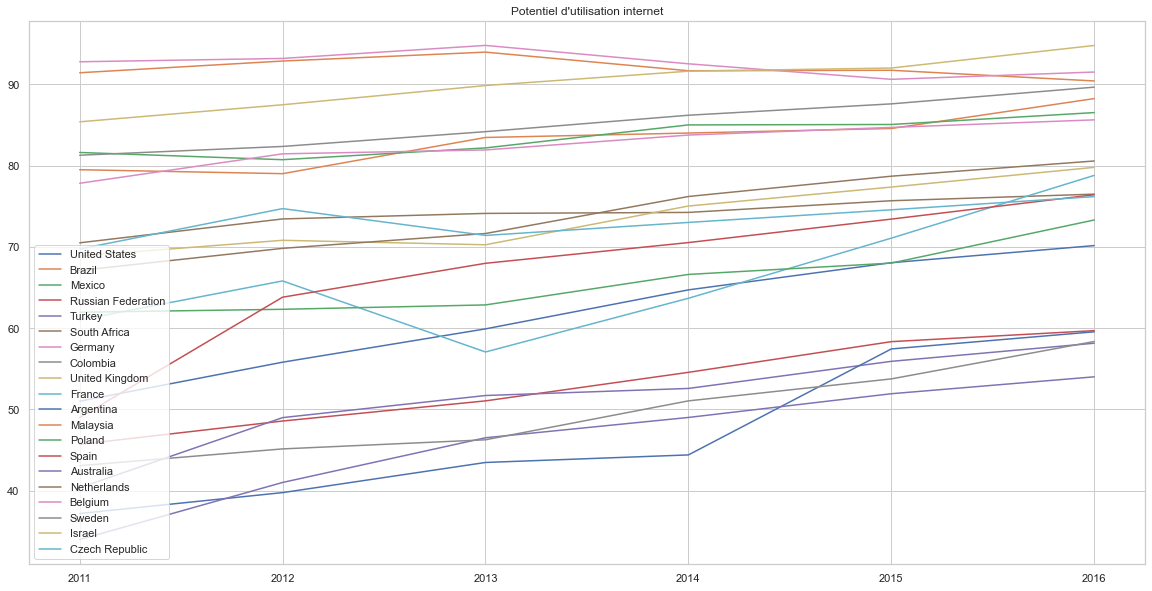

In [122]:
import warnings
warnings.filterwarnings('ignore')
plt.figure(figsize=(20,10))
for country in data_final_melt['Country Name'].unique():    
    sns.lineplot(data_final_melt[data_final_melt['Indicator Code'] == 'IT.NET.USER.P2'][data_final_melt['Country Name'] == country]['Year'].values,
                 data_final_melt[data_final_melt['Indicator Code'] == 'IT.NET.USER.P2'][data_final_melt['Country Name'] == country]['Value'].values)
plt.legend(edStatDataAggregeFiltered['Country Name'].values, loc = 'lower left')
plt.title('Potentiel d\'utilisation internet')
plt.show()  

Malheureusement nos indicateurs ne fournissent pas de données au delà de 2016 mais on voit que la tendance pour les clients potentiels est à la hausse concernant l'utilisation d'internet.
Vérifions la tendance pour les inscrits au tertiaire:

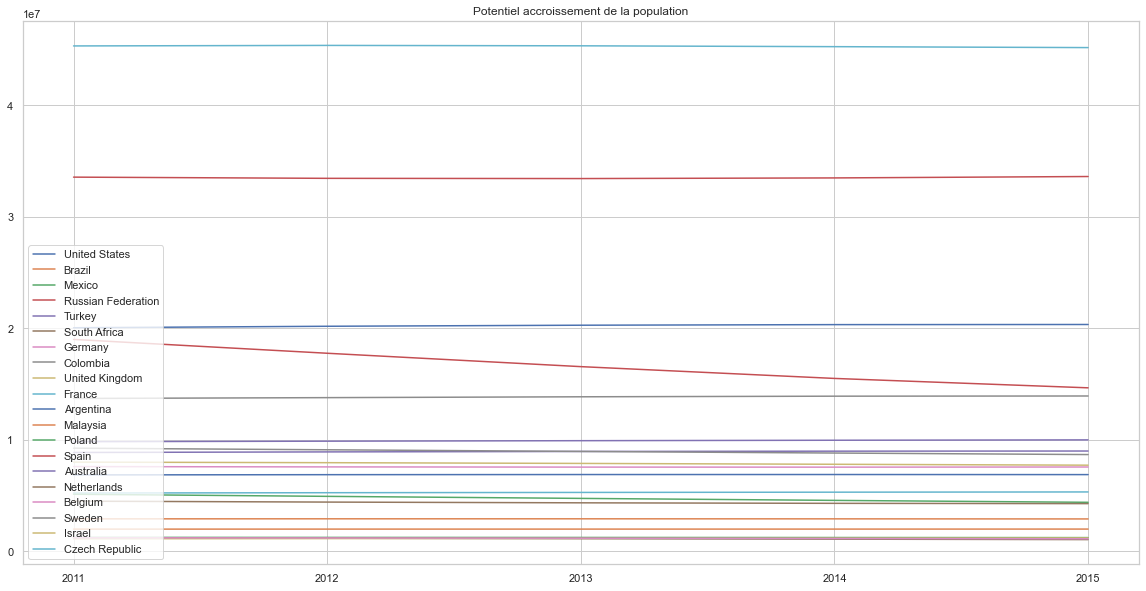

In [124]:
plt.figure(figsize=(20,10))
for country in data_final_melt['Country Name'].unique():    
    sns.lineplot(data_final_melt[data_final_melt['Indicator Code'] == 'SP.POP.1524.TO.UN'][data_final_melt['Country Name'] == country]['Year'].values,
                 data_final_melt[data_final_melt['Indicator Code'] == 'SP.POP.1524.TO.UN'][data_final_melt['Country Name'] == country]['Value'].values)
plt.legend(edStatDataAggregeFiltered['Country Name'].values, loc = 'lower left')    
plt.title('Potentiel accroissement de la population')
plt.show() 

La tendance est globalement à la hausse concernant la population entre 15 et 25 ans (indicateur que l'on peut supposer corrélé avec le nombre d'inscrits dans le tertiaire).
On observe cependant une exception avec l'Espagne:

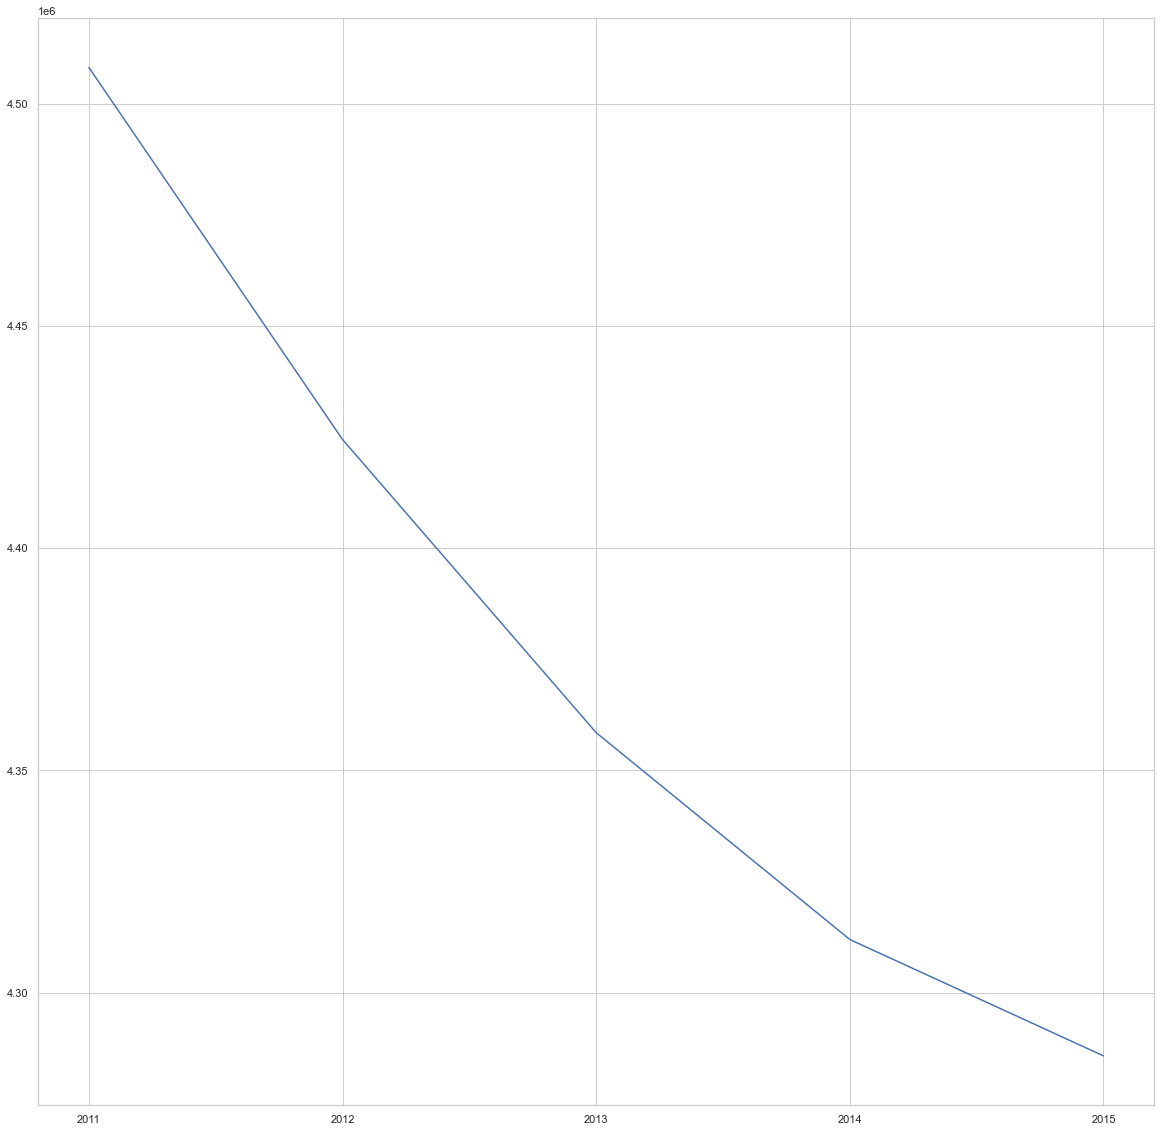

In [112]:
plt.figure(figsize=(20,20))
sns.lineplot(data_final_melt[data_final_melt['Indicator Code'] == 'SP.POP.1524.TO.UN'][data_final_melt['Country Name'] == 'Spain']['Year'].values,
                 data_final_melt[data_final_melt['Indicator Code'] == 'SP.POP.1524.TO.UN'][data_final_melt['Country Name'] == 'Spain']['Value'].values)
plt.show()

La population globale de l'Espagne a baissé de 2010 (46.58 millions) à 2015 (46.44 millions), mais est en hausse à nouveau depuis 2016. 
On peut donc supposer que la population entre 15 et 25 ans a aussi augmenté entre temps.

****Conclusion****

Les données que nous possédons nous permettent de dresser une liste de clients potentiels mais ne nous permettent pas directement de
tirer des conclusions sur le potentiel de ces pays.
On peut uniquement supposer que les pays qui voient leur population augmenter vont voir le nombre d'inscrits dans le tertiaire 
augmenter.
Il eut été intéressant d'avoir le pourcentage d'utilisateurs internet entre 15 et 25 qui nous aurait permis, en le combinant avec la population entre 15 et 25 ans, d'avoir le nombre d'utilisateurs internet de la population ciblée.
L'analyse a aussi été limitée aux jeunes, en ignorant les adultes de plus de 25 ans en reconversion professionnelle. 
